# Airbnb Analysis

**This project is the first project for Udacity's Data Scientist Nanodegree. The data used in this project was obtained from Airbnb in cooperation with Kaggle. The project was completed following the 'Cross Industry Standard Process for Data Mining (CRISP-DM)'**

---
**Project Steps :**
- Business Understanding
- Data Understanding
- Data preparation
- Data Modeling
- Result Evaluation


## Business Understanding

**Airbnb is one of the leading online platforms which lets people rent out their properties or spare rooms to guests. During this analysis of the listings, I will try to answer a couple of questions that is done to help the owners understand what to take into consideration when listing an apartment on the platform...**

- What features have the highest correlation with the price?
- Can we predict the price from the given features?
- Can we predict the weekly and monthly price from the price?
- Is there a price difference between Boston and Seattle?
- Do local postings from hosts in the same city value higher then remote postings?

In [1]:
Medium_link : 'https://medium.com/@isbader95/airbnb-boston-seattle-analysis-df053abb93f7?sk=1f3fa5c14ff300faba75cdbec331d426'

***
***

In [211]:
#Imports
import pandas as pd 
import numpy as np 
import sklearn
import math
import folium
import analysis_utils
from folium import plugins

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#pd.set_option('display.max_rows', 20)

## Data Understaning

**For this project two main datasets were used:-**

- Seattle AirBNB Data : (https://www.kaggle.com/airbnb/seattle/data) 
- Boston AirBNB Data : (https://www.kaggle.com/airbnb/boston)

**One Data set was used get the zipcode locations for neighborhoods instead of the property zip code**

- ZipCode Data: (https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/)

### Boston Data

In [3]:
#Reading the data
boston_listing = pd.read_csv('data/boston/listings.csv')

In [4]:
#Understanding the data
boston_listing.columns , boston_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules',
        'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
        'host_picture_url', 'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'street',
        'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
     

In [5]:
boston_listing.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [6]:
# The overall null values in the boston dataset
boston_listing.isnull().sum().sum()

50229

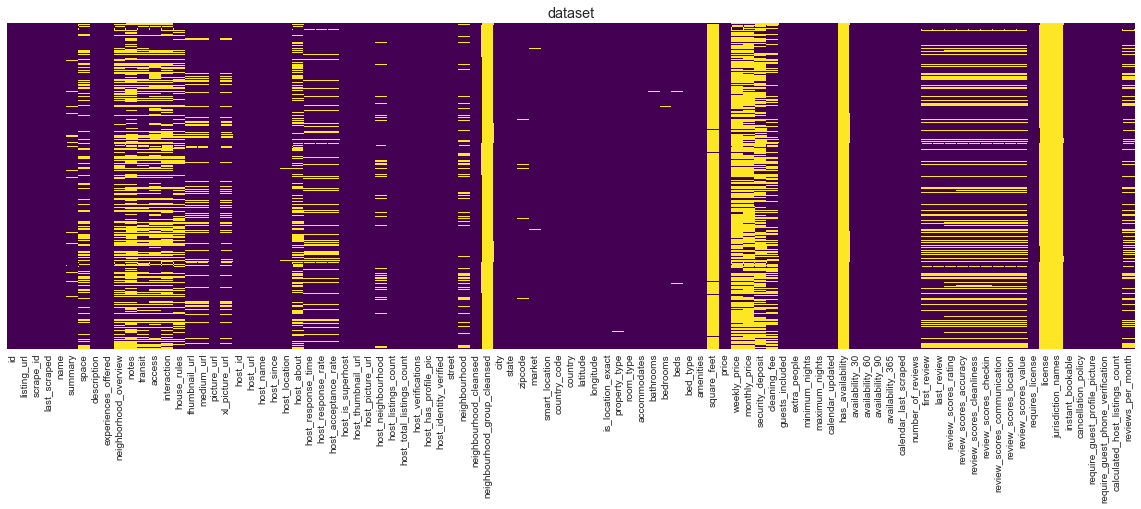

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 3 With 143 missing values
space : % 29 With 1057 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 39 With 1415 missing values
notes : % 55 With 1975 missing values
transit : % 35 With 1290 missing values
access : % 41 With 1489 missing values
interaction : % 43 With 1554 missing values
house_rules : % 33 With 1192 missing values
thumbnail_url : % 16 With 599 missing values
medium_url : % 16 With 599 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 16 With 599 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 0 missing values
host_since : % 0 With 0 missing values
host_location : % 0 With 11 missing values
host_about : % 36 With 1309 

In [7]:
#Understand and visualize the missing values for the Boston dataset
analysis_utils.missing_heat_map(boston_listing)

In [8]:
# Make a column to identify the city before merging
boston_listing['city'].fillna('boston',inplace=True)
boston_listing['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Jamaica Plain                  18
Brookline                      18
Cambridge                      16
Charlestown                    15
Brighton                       15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
boston                          3
East Boston                     3
Boston, Massachusetts, US       2
Hyde Park                       2
ALLSTON                         2
Jamaica Plain                   2
South Boston                    2
Jamaica Plain, Boston           2
Jamaica Plain, MA               1
Boston (Charlestown)            1
Jamaica Plain (Boston)          1
Boston (Jamaica Plain)          1
east Boston                     1
Roslindale, Boston              1
Mission Hill, Boston            1
dorchester, bo

### Seattle Data

In [9]:
# Reading the data
seattle_listing = pd.read_csv('data/seattle/listings.csv')

In [10]:
# Getting column info
seattle_listing.columns , seattle_listing.shape

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
        'host_location', 'host_about', 'host_response_time',
        'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_listings_count', 'host_total_listings_count',
        'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
        'street', 'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude',
        'is_location_exact', 'property_type', 'room_type', 'accommodates',
        'bathrooms', 'bedrooms', 'beds', 'bed_type', 

In [11]:
# Get the overall missing values for the Seattle dataset
seattle_listing.isnull().sum().sum()

29819

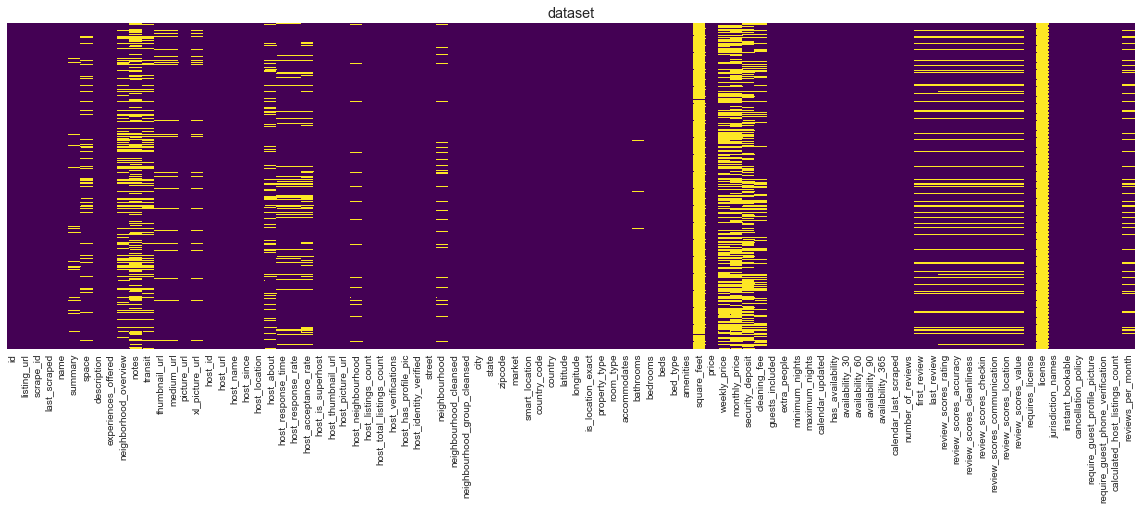

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 177 missing values
space : % 14 With 569 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 27 With 1032 missing values
notes : % 42 With 1606 missing values
transit : % 24 With 934 missing values
thumbnail_url : % 8 With 320 missing values
medium_url : % 8 With 320 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 8 With 320 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 8 missing values
host_about : % 22 With 859 missing values
host_response_time : % 13 With 523 missing values
host_response_rate : % 13 With 523 missing values
host_acceptance_rat

In [12]:
# Understand the missing values for Seattle dataset
analysis_utils.missing_heat_map(seattle_listing)

In [13]:
# Make a column to identify the city before merging
seattle_listing['city'].fillna('seattle',inplace=True)
seattle_listing['city'].value_counts()

Seattle                  3810
Seattle                     2
West Seattle                2
Ballard, Seattle            1
西雅图                         1
seattle                     1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [14]:
# Get the column list that is in both datasets
column_list = set(seattle_listing.columns).intersection(boston_listing.columns)
column_list = list(column_list)

In [15]:
# check that the columns match before merging the two datasets 

# get the unique columns in the seattle dataset
seattle_unique = [x for x in seattle_listing if x not in column_list]
print('The unique columns in the seattle_dataset are : {}'.format(seattle_unique))

# get the unique columns in the boston_ls dataset
boston_unique = [x for x in boston_listing if x not in column_list]
print('The unique columns in the boston_dataset are : {}'.format(boston_unique))

The unique columns in the seattle_dataset are : []
The unique columns in the boston_dataset are : ['access', 'interaction', 'house_rules']


**This means that both datasets don't have column naming issues and can be merged without duplicate columns**

In [16]:
#Checking the unique columns in the boston dataset
boston_listing[['access','interaction','house_rules']].isnull().sum()

access         1489
interaction    1554
house_rules    1192
dtype: int64

In [17]:
#since the columns are in only one dataset we are going to delete them
for i in boston_unique:
    del boston_listing[i]

In [18]:
# merge both datasets for an easier cleaning process
df = pd.concat([seattle_listing,boston_listing],ignore_index=True) 

In [19]:
df.shape

(7403, 92)

In [20]:
df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [21]:
# Saved the merged dataset for the Data prepration process
df.to_csv('data/full_data.csv')

### Zipcode Data

In [22]:
# Get outside data to get the latitude and longitude of each zipcode
us_zip_info = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv',sep=';')

In [23]:
us_zip_info.head()

Zip      City State   Latitude  Longitude  Timezone  \
0  71937      Cove    AR  34.398483  -94.39398        -6   
1  72044  Edgemont    AR  35.624351  -92.16056        -6   
2  56171  Sherburn    MN  43.660847  -94.74357        -6   
3  49430    Lamont    MI  43.010337  -85.89754        -5   
4  52585  Richland    IA  41.194129  -91.98027        -6   

   Daylight savings time flag             geopoint  
0                           1  34.398483,-94.39398  
1                           1  35.624351,-92.16056  
2                           1  43.660847,-94.74357  
3                           1  43.010337,-85.89754  
4                           1  41.194129,-91.98027

***
***

## Data prepreation

In [24]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7403 non-null   int64  
 1   listing_url                       7403 non-null   object 
 2   scrape_id                         7403 non-null   int64  
 3   last_scraped                      7403 non-null   object 
 4   name                              7403 non-null   object 
 5   summary                           7083 non-null   object 
 6   space                             5777 non-null   object 
 7   description                       7403 non-null   object 
 8   experiences_offered               7403 non-null   object 
 9   neighborhood_overview             4956 non-null   object 
 10  notes                             3822 non-null   object 
 11  transit                           5179 non-null   object 
 12  thumbn

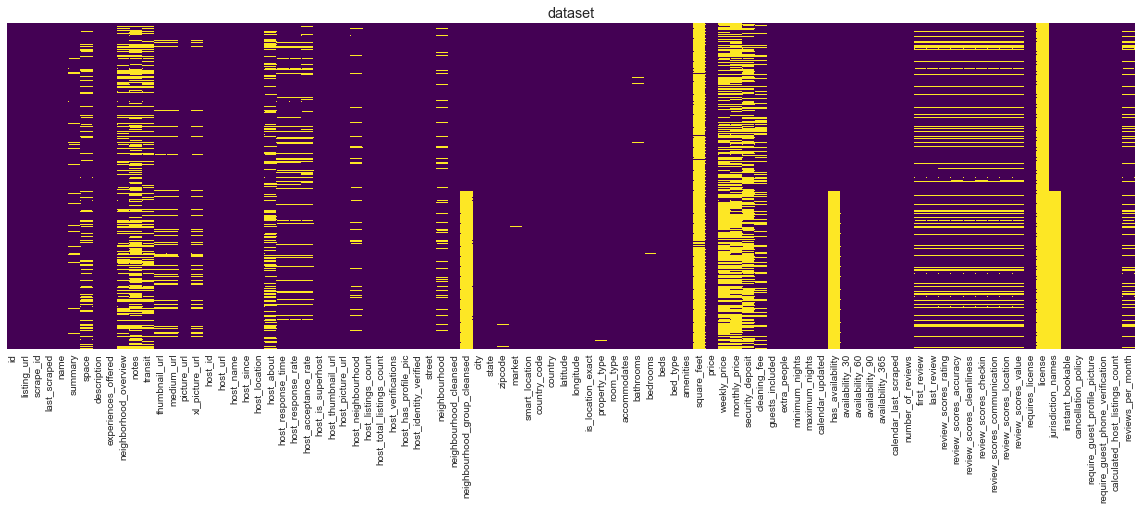

id : % 0 With 0 missing values
listing_url : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 4 With 320 missing values
space : % 21 With 1626 missing values
description : % 0 With 0 missing values
experiences_offered : % 0 With 0 missing values
neighborhood_overview : % 33 With 2447 missing values
notes : % 48 With 3581 missing values
transit : % 30 With 2224 missing values
thumbnail_url : % 12 With 919 missing values
medium_url : % 12 With 919 missing values
picture_url : % 0 With 0 missing values
xl_picture_url : % 12 With 919 missing values
host_id : % 0 With 0 missing values
host_url : % 0 With 0 missing values
host_name : % 0 With 2 missing values
host_since : % 0 With 2 missing values
host_location : % 0 With 19 missing values
host_about : % 29 With 2168 missing values
host_response_time : % 13 With 994 missing values
host_response_rate : % 13 With 994 missing values
host_accepta

In [25]:
#visulize the missing values of the merged dataset to start cleaning
analysis_utils.missing_heat_map(df)

**After inspecting all of the columns these are the changes that need to be made**

|Feature|Old_type|Action|New_type|
|---|---|---|---|
|**listing_url**|`object`|Delete since the URL is not needed||
|**picture_url**|`object`|Delete since the URL is not needed||
|**xl_picture_url**|`object`|Delete since the URL is not needed||
|**host_url**|`object`|Delete since the URL is not needed||
|**host_thumbnail_url**|`object`|Delete since the URL is not needed||
|**medium_url**|`object`|Delete since the URL is not needed||
|**thumbnail_url**|`object`|Delete since the URL is not needed||
|**host_picture_url**|`object`|Delete since the URL is not needed||
|---|---|---|---|
|**square_feet**|`float64`|Delete since %97 of data is missing||
|**license**|`float64`|Delete since %100 of data is missing||
|**country**|`object`|Delete to avoid redundency|
|**experiences_offered**|`object`|delete since all values are none|
|---|---|---|---|
|**price**|`object`|Remove dollar sign and punctuations|`Float64`|
|**weekly_price**|`object`|Remove dollar sign and punctuations then try to predict|`Float64`|
|**monthly_price**|`object`|Remove dollar sign and punctuations then try to predict|`Float64`|
|**security_deposit**|`object`|replace null values with 0|`Float64`|
|**cleaning_fee**|`object`|replace null values with 0|`Float64`|
|**guests_included**|`int64`|clean|`int64`
|**extra_people**|`object`|Remove dollar sign and punctuations|`Float64`|
|---|---|---|---|
|**summary**|`object`|Get the word count insted|`int64`|
|**space**|`object`|Get the word count insted|`int64`|
|**description**|`object`|Get the word count insted|`int64`|
|**neighborhood_overview**|`object`|Get the word count insted|`int64`|
|**transit**|`object`|Get the word count insted|`int64`|
|**host_about**|`object`|Get the word count insted|`int64`|
|**notes**|`object`|Get the word count insted|`int64`|
|---|---|---|---|
|**host_location**|`object`|Fill missing values with 'unknown' and grab only the city|`object`|
|**smart_location**|`object`|split to grab the city only and change to lower case|`object`|
|**state**|`object`|Change all to lower case|`object`|
|**latitude**|`Float`|clean|`Float`|
|**longitude**|`Float`|clean|`Float`|
|**neighbourhood**|`object`|fill missing values from neighbourhood_cleansed|`object`|
|**is_location_exact**|`object`|change to bool|`int64`|
|**zipcode**|`object`|clean to get the digits only|`int64`|
|**host_match**|`int64`|added bool feature to check post and host location match|`int64`|
|**street**|`object`|delete I will not be using it|
|**country_code**|`object`|delete I will not be using it|
|**city**|`object`|delete to avoid redundency|
|**neighbourhood_group_cleansed**|`object`|delete to avoid redundency|
|**neighbourhood_cleansed**|`object`|delete to avoid redundency|
|---|---|---|---|
|**host_id**|`int64`|clean|`int64`|
|**host_name**|`object`|replace null with none|`object`|
|**host_since**|`date_time`|replace null with median|`datetime64`|
|**host_response_time**|`object`|replace null with none|`object`|
|**host_response_rate**|`object`|replace from median|`float64`|
|**host_acceptance_rate**|`object`|replace from median|`float64`|
|**host_is_superhost**|`object`|replace with int bool|`int64`|
|**host_neighbourhood**|`object`|delete unnecessary|
|**host_year**|`int64`|created this new column to represent the year the host joined|`int64`|
|---|---|---|---|
|**host_listings_count**|`float64`|replace null with mean|`int64`|
|**host_total_listings_count**|`float64`|Delete to avoid redundency|
|**host_has_profile_pic**|`object`|change to bool and replace null with 0|`int64`|
|**host_identity_verified**|`object`|change to bool and replace null with 0|`int64`|
|**host_verifications**|`object`|Replace with the number of verifications|`int64`|
|**market**|`object`|delete to avoid redundency|
|---|---|---|---|
|**property_type**|`object`|replace null with mode|`object`|
|**room_type**|`object`|replace null with mode|`object`|
|**accommodates**|`int64`|clean|`int64`|
|**bathrooms**|`float64`|replace null values with mode|`float64`|
|**bedrooms**|`float64`|replace null values with mode|`float64`|
|**beds**|`float64`|replace missing with the mode|`float64`|
|**bed_type**|`object`|clean|`object`|
|**amenities**|`object`|get the count of amenities|`int64`|
|---|---|---|---|
|**number_of_reviews**|`int64`|clean|`int64`|
|**first_review**|`object`|change to date-time fromat and clean|`datetime64`|
|**last_review**|`object`|change to date-time format and clean|`datetime64`|
|**review_scores_rating**|`float64`|replace null values with mean|`float64`|
|**review_scores_accuracy**|`float64`|replace null values with mean|`float64`|
|**review_scores_cleanliness**|`float64`|replace null values with mean|`float64`|
|**review_scores_checkin**|`float64`|replace null values with mean|`float64`|
|**review_scores_communication**|`float64`|replace null values with mean|`float64`|
|**review_scores_location**|`float64`|replace null values with mean|`float64`|
|**review_scores_value**|`float64`|replace null values with mean|`float64`|
|---|---|---|---|
|**minimum_nights**|`int64`|clean|`int64`|
|**maximum_nights**|`int64`|clean|`int64`|
|**calendar_updated**|`object`|clean|`object`|
|**has_availability**|`object`|change with int bool and fill null with 0|`int64`|
|**availability_30**|`int64`|clean|`int64`|
|**availability_60**|`int64`|clean|`int64`|
|**availability_90**|`int64`|clean|`int64`|
|**availability_365**|`int64`|clean|`int64`|
|**calendar_last_scraped**|`object`|unnecessary delete|
|---|---|---|---|
|**instant_bookable**|`object`|change to int bool|`int64`|
|**cancellation_policy**|`object`|clean|`object`|
|**instant_bookable**|`object`|change to int bool|`int64`|
|**require_guest_profile_picture**|`float64`|change to int bool|`int64`|
|**require_guest_phone_verification**|`float64`|change to int bool|`int64`|
|**calculated_host_listings_count**|`int64`|clean|`int64`|
|**reviews_per_month**|`float64`|fill missing with mean|`float64`|
|**requires_license**|`object`|change to int bool (delete since all values are false)|
|**jurisdiction_names**|`object`|delete not nacassery|




---
#### Deleted Features
---

**These are unnecessary columns (giving the URL) which will not assist us in our analysis so they will be removed**

|Feature|Old_type|Action|New_type
|---|---|---|---|
|**listing_url**|`object`|Delete since the URL is not needed||
|**picture_url**|`object`|Delete since the URL is not needed||
|**xl_picture_url**|`object`|Delete since the URL is not needed||
|**host_url**|`object`|Delete since the URL is not needed||
|**host_thumbnail_url**|`object`|Delete since the URL is not needed||
|**medium_url**|`object`|Delete since the URL is not needed||
|**thumbnail_url**|`object`|Delete since the URL is not needed||
|**host_picture_url**|`object`|Delete since the URL is not needed||

In [26]:
# These are unnessary columns which will not assist us in our analysis so they will be removed
remove_url = ['listing_url','picture_url','xl_picture_url','host_url','host_thumbnail_url',\
          'medium_url','thumbnail_url','host_picture_url']

#loop to delete
for i in remove_url:
    del df[i]

---
#### Deleted Features
---

|Feature|Old_type|Action|New_type|
|---|---|---|---|
|**square_feet**|`float64`|Delete since %97 of data is missing||
|**license**|`float64`|Delete since %100 of data is missing||
|**country**|`object`|Delete to avoid redundency|
|**experiences_offered**|`object`|delete since all values are none|

In [27]:
#place in a list for easier access
test = ['square_feet','license','country','experiences_offered']
#view the data
df[test].head()

square_feet  license        country experiences_offered
0          NaN      NaN  United States                none
1          NaN      NaN  United States                none
2          NaN      NaN  United States                none
3          NaN      NaN  United States                none
4          NaN      NaN  United States                none

In [28]:
#get the null values of the data
df[test].isnull().sum()

square_feet            7250
license                7403
country                   0
experiences_offered       0
dtype: int64

**From what I observed the above columns should be deleted due to the fact that they dont add any value to the analysis**

In [29]:
# delete the columns above
for i in test:
    del df[i]

---
#### Price Features
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**price**|`object`|Remove dollar sign and punctuations|`Float64`|
|**weekly_price**|`object`|Remove dollar sign and punctuations then try to predict|`Float64`|
|**monthly_price**|`object`|Remove dollar sign and punctuations then try to predict|`Float64`|
|**security_deposit**|`object`|replace null values with 0|`Float64`|
|**cleaning_fee**|`object`|replace null values with 0|`Float64`|
|**guests_included**|`int64`|clean|`int64`
|**extra_people**|`object`|Remove dollar sign and punctuations|`Float64`|

In [30]:
# place the columns above in a list 
test = ['price','weekly_price','monthly_price','security_deposit',\
           'cleaning_fee','extra_people']

In [31]:
df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             7403 non-null   object
 1   weekly_price      2901 non-null   object
 2   monthly_price     2405 non-null   object
 3   security_deposit  3208 non-null   object
 4   cleaning_fee      5266 non-null   object
 5   extra_people      7403 non-null   object
dtypes: object(6)
memory usage: 347.1+ KB


In [32]:
# view the data
df[test].head()

price weekly_price monthly_price security_deposit cleaning_fee  \
0   $85.00          NaN           NaN              NaN          NaN   
1  $150.00    $1,000.00     $3,000.00          $100.00       $40.00   
2  $975.00          NaN           NaN        $1,000.00      $300.00   
3  $100.00      $650.00     $2,300.00              NaN          NaN   
4  $450.00          NaN           NaN          $700.00      $125.00   

  extra_people  
0        $5.00  
1        $0.00  
2       $25.00  
3        $0.00  
4       $15.00

In [33]:
# check the missing value
df[test].isnull().sum()

price                  0
weekly_price        4502
monthly_price       4998
security_deposit    4195
cleaning_fee        2137
extra_people           0
dtype: int64

In [34]:
# Remove the punctuation and replace null values with 0 and change to float for all above columns
for i in test:
    df[i] = df[i].apply(lambda x: analysis_utils.get_number(x.split('.')[0])\
                        if type(x) == str  else 0)

Tukeys method number of outliers is 306
90% confidence interval has 375 values between 148.0 and 153.0


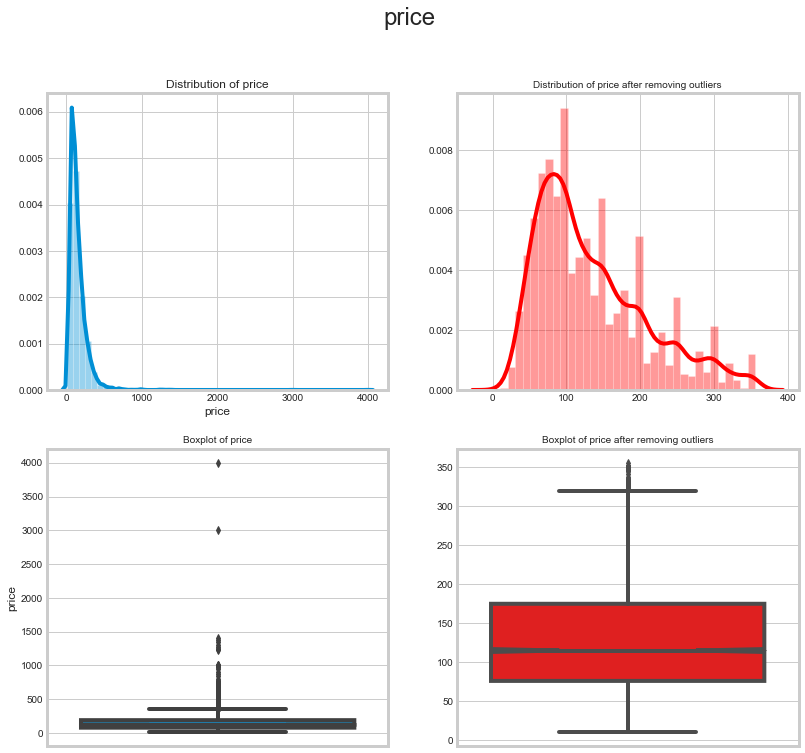

In [35]:
#visualize the distribution of price to have a better understanding
analysis_utils.no_outlier('price',df)

**We can see that the price column is right-skewed. Although after removing the outliers we get a better distribution I believe that I should not remove the outliers since higher price listings are going to be less in general but they will always be there.**

Tukeys method number of outliers is 374
90% confidence interval has 47 values between 315.0 and 335.0


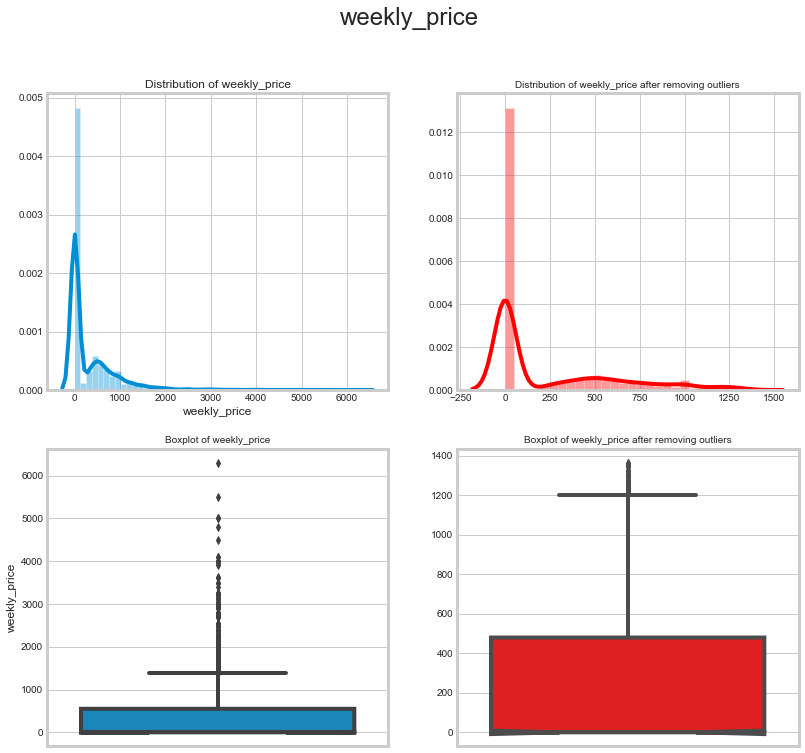

In [36]:
#check the distribution of the monthly_price
analysis_utils.no_outlier('weekly_price',df)

Tukeys method number of outliers is 568
90% confidence interval has 65 values between 942.0 and 1015.0


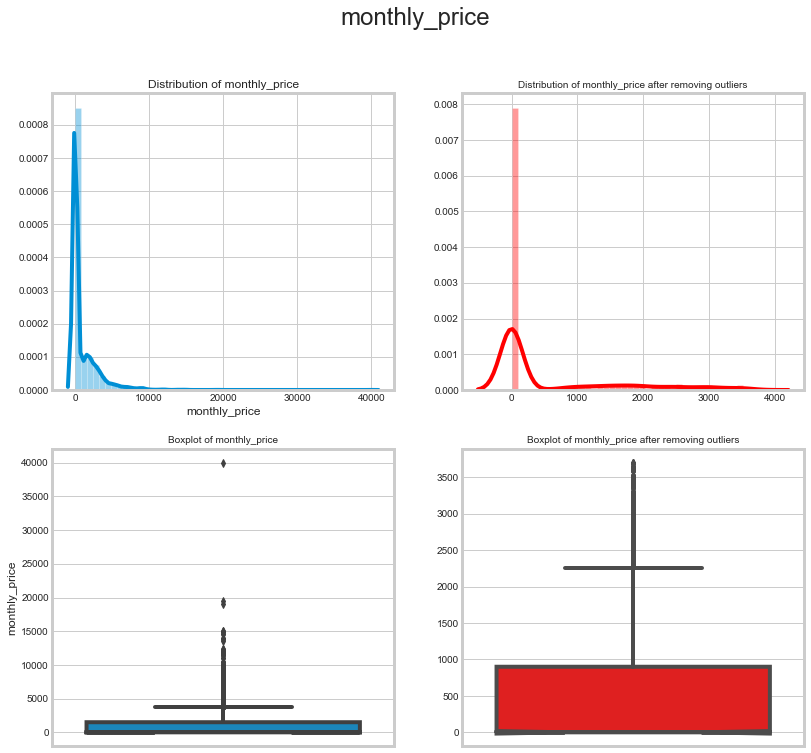

In [37]:
#check the distribution of the monthly_price
analysis_utils.no_outlier('monthly_price',df)

Tukeys method number of outliers is 656
90% confidence interval has 2 values between 127.0 and 136.0


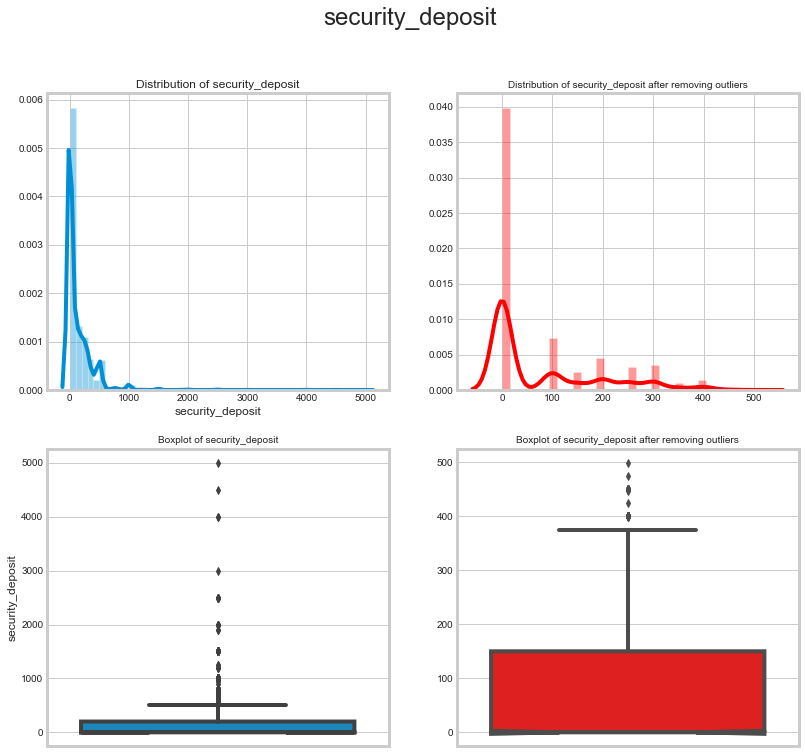

In [38]:
# check the distribution of the security deposit
analysis_utils.no_outlier('security_deposit',df)

Tukeys method number of outliers is 202
90% confidence interval has 0 values between 45.0 and 47.0


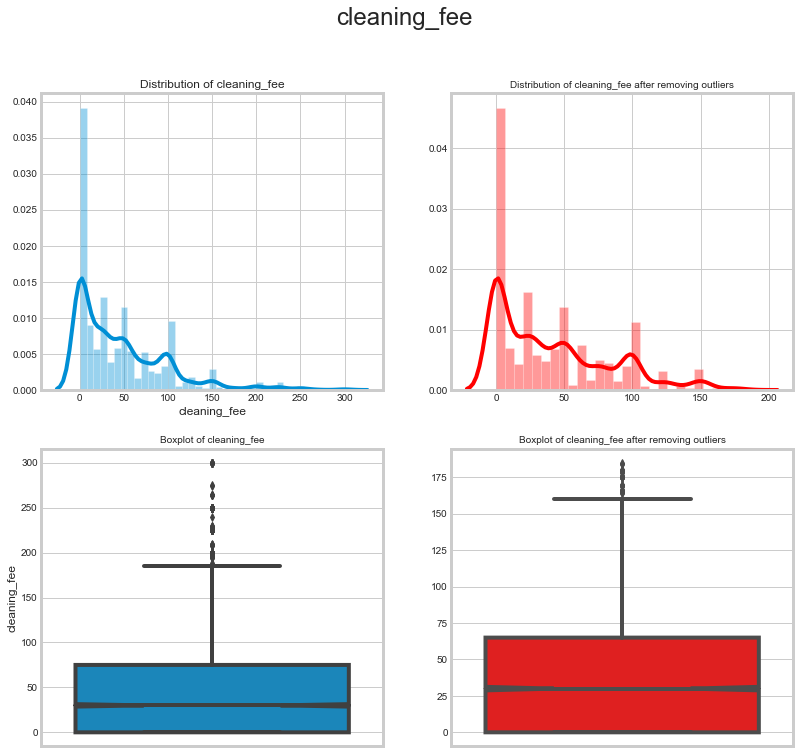

In [39]:
#check the distribution of the cleaning fee
analysis_utils.no_outlier('cleaning_fee',df)

**We can see that the financial data has a similar pattern, therefore, I will attempt to answer my question of whether we can predict the weekly and monthly price using the data to fill the null values (Modeling section)**

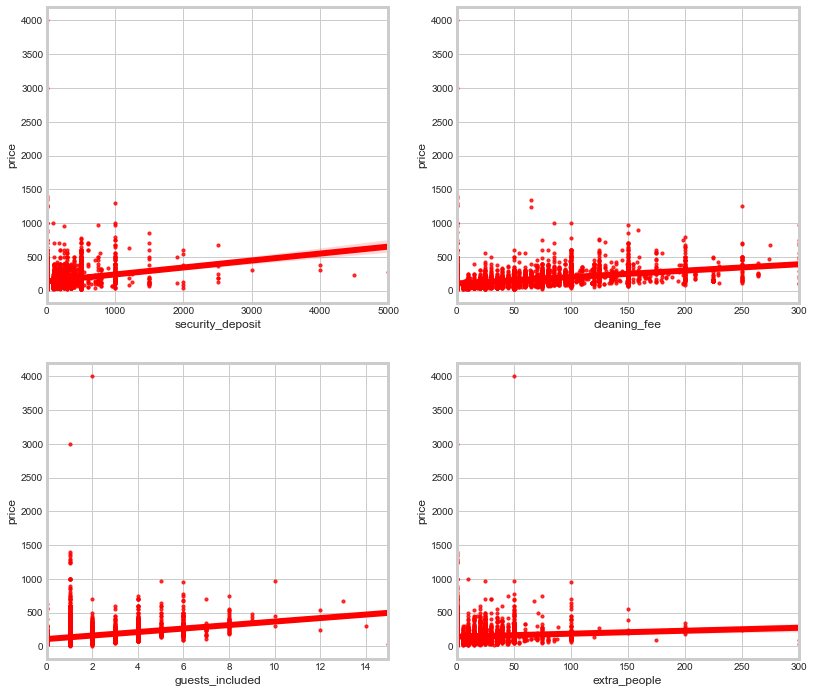

In [40]:
# visualize the columns to view the correlation with the price
dependent = ['security_deposit','cleaning_fee','guests_included','extra_people']
target = 'price'
analysis_utils.plot_line_correlation(dependent,target,df)

---
#### Description Features
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**summary**|`object`|Get the word count insted|`int64`|
|**space**|`object`|Get the word count insted|`int64`|
|**description**|`object`|Get the word count insted|`int64`|
|**neighborhood_overview**|`object`|Get the word count insted|`int64`|
|**transit**|`object`|Get the word count insted|`int64`|
|**host_about**|`object`|Get the word count insted|`int64`|
|**notes**|`object`|Get the word count insted|`int64`|


**Since I will not choose an NLP approach. I will extract the number of words for each of these strings**

In [41]:
test = ['summary','space','description','neighborhood_overview','transit','host_about','notes']

In [42]:
# view the data
df[test].head()

summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description  \
0  Make your self at home in this charming one-be...   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   
2  Upper Queen Anne is a charming neighborhood fu...   
3                                                NaN   
4  We are in the beautiful neighborhood of Queen ...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   
2  A bus stop is just 2 blocks away.   Easy bus a...   
3                                                NaN   
4  The nearest public transit bus (D Line) is 2 b...   

                                          host_about  \
0  I am an artist, interior designer, and run a s...   
1  Living east coast/left coast/overseas.  Time i...   
2  i love living in Seattle.  i grew up in the mi...   
3                                                NaN   
4  Hi, I live in Seattle, Washington but I'm orig...   

                                               notes  
0                                                NaN  
1  What's up with the free pillows?  Our home was...  
2  Our house is located just 5 short blocks to To...  
3                                                NaN  
4                                          Belltown

In [43]:
df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   summary                7083 non-null   object
 1   space                  5777 non-null   object
 2   description            7403 non-null   object
 3   neighborhood_overview  4956 non-null   object
 4   transit                5179 non-null   object
 5   host_about             5235 non-null   object
 6   notes                  3822 non-null   object
dtypes: object(7)
memory usage: 405.0+ KB


In [44]:
# Change the text into word_count for better analysis
for i in test:
    df[i] = analysis_utils.get_wordcount(i,df)

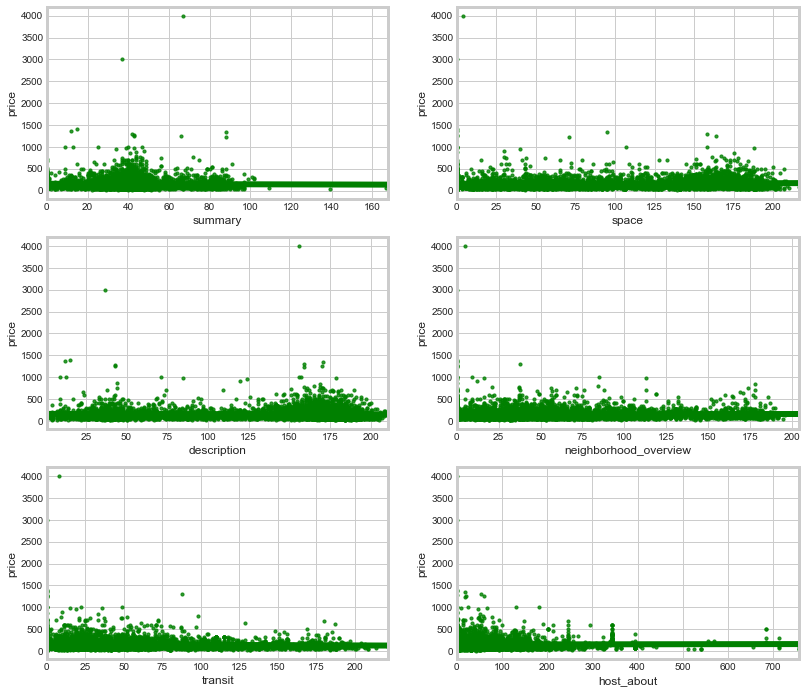

In [45]:
analysis_utils.plot_line_correlation(test[0:6],'price',df,'green')

In [46]:
df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   summary                7403 non-null   int64
 1   space                  7403 non-null   int64
 2   description            7403 non-null   int64
 3   neighborhood_overview  7403 non-null   int64
 4   transit                7403 non-null   int64
 5   host_about             7403 non-null   int64
 6   notes                  7403 non-null   int64
dtypes: int64(7)
memory usage: 405.0 KB


---
#### Location features:-
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**host_location**|`object`|Fill missing values with 'unknown' and grab only the city|`object`|
|**smart_location**|`object`|split to grab the city only and change to lower case|`object`|
|**state**|`object`|Change all to lower case|`object`|
|**latitude**|`Float`|clean|`Float`|
|**longitude**|`Float`|clean|`Float`|
|**neighbourhood**|`object`|fill missing values from neighbourhood_cleansed|`object`|
|**is_location_exact**|`object`|change to bool|`int64`|
|**zipcode**|`object`|clean to get the digits only|`int64`|
|**host_match**|`int64`|added bool feature to check post and host location match|`int64`|
|**street**|`object`|delete I will not be using it|
|**country_code**|`object`|delete I will not be using it|
|**city**|`object`|delete to avoid redundency|
|**neighbourhood_group_cleansed**|`object`|delete to avoid redundency|
|**neighbourhood_cleansed**|`object`|delete to avoid redundency|


In [47]:
#get info about columns
test = ['host_location','smart_location','city','state','country_code',\
    'is_location_exact','zipcode','street','neighbourhood','latitude',\
    'longitude','neighbourhood_cleansed']
df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_location           7384 non-null   object 
 1   smart_location          7403 non-null   object 
 2   city                    7403 non-null   object 
 3   state                   7403 non-null   object 
 4   country_code            7403 non-null   object 
 5   is_location_exact       7403 non-null   object 
 6   zipcode                 7358 non-null   object 
 7   street                  7403 non-null   object 
 8   neighbourhood           6444 non-null   object 
 9   latitude                7403 non-null   float64
 10  longitude               7403 non-null   float64
 11  neighbourhood_cleansed  7403 non-null   object 
dtypes: float64(2), object(10)
memory usage: 694.2+ KB


In [48]:
df[test].head()

host_location smart_location     city state  \
0  Seattle, Washington, United States    Seattle, WA  Seattle    WA   
1  Seattle, Washington, United States    Seattle, WA  Seattle    WA   
2  Seattle, Washington, United States    Seattle, WA  Seattle    WA   
3  Seattle, Washington, United States    Seattle, WA  Seattle    WA   
4  Seattle, Washington, United States    Seattle, WA  Seattle    WA   

  country_code is_location_exact zipcode  \
0           US                 t   98119   
1           US                 t   98119   
2           US                 t   98119   
3           US                 t   98119   
4           US                 t   98119   

                                              street neighbourhood   latitude  \
0      Gilman Dr W, Seattle, WA 98119, United States    Queen Anne  47.636289   
1  7th Avenue West, Seattle, WA 98119, United States    Queen Anne  47.639123   
2  West Lee Street, Seattle, WA 98119, United States    Queen Anne  47.629724   
3  8th Avenue West, Seattle, WA 98119, United States    Queen Anne  47.638473   
4       14th Ave W, Seattle, WA 98119, United States    Queen Anne  47.632918   

    longitude neighbourhood_cleansed  
0 -122.371025        West Queen Anne  
1 -122.365666        West Queen Anne  
2 -122.369483        West Queen Anne  
3 -122.369279        West Queen Anne  
4 -122.372471        West Queen Anne

**split the locations to get the city only which will reduce the value count and help with matching the host location to the property location**

In [49]:
#split the host_location to get only the city
df['host_location'] = df['host_location'].apply(lambda x : x.split(',')[0].split(' ')[0].lower() if type(x) == str else 'unknown')
#split the property location to get only the city
df['smart_location'] = df['smart_location'].apply(lambda x : x.split(',')[0].split(' ')[0].lower() if type(x) == str else 'unknown')

**check weather the host lives in the same city of the property or not**

In [50]:
#compare if the columns are equal put local else remote 
df['host_match'] = np.where(df['host_location'] == df['smart_location'], 'local', 'remote')

In [51]:
df['host_match'].value_counts()

local     5599
remote    1804
Name: host_match, dtype: int64

#### Answer the Qustion : Do local postings from hosts in the same city value higher then remote postings?

In [52]:
# group host match and get the price mean
df[['host_match','price']].groupby('host_match').mean()

price
host_match            
local       140.661725
remote      179.917960

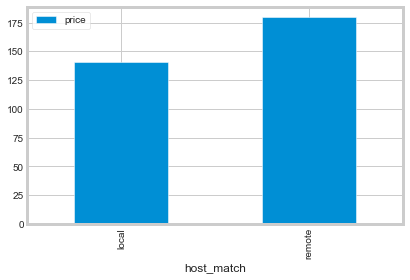

In [53]:
#group the data by host_match to findout the price mean local listings vs remote
df[['host_match','price']].groupby('host_match').mean().plot(kind='bar')

**From what we see above remote listings have a higher price of around %20 compared to local listings**

In [54]:
#to change back to int:bool compare if the columns are equal put 1 else 0
df['host_match'] = np.where(df['host_location'] == df['smart_location'], 1, 0)

In [55]:
df['host_match'].value_counts()

1    5599
0    1804
Name: host_match, dtype: int64

In [56]:
# change the varibles to boolean of 0 and 1
df['is_location_exact'] = df['is_location_exact'].apply(lambda x : 1 if x == 't' else 0)
df['is_location_exact'].value_counts()

1    6492
0     911
Name: is_location_exact, dtype: int64

#### Answer the Qustion : How dose the prices vary from one state to another?

In [57]:
# change state to lower case
df['state'] = df['state'].apply(lambda x : x.lower())
df['state'].value_counts()

#group the states and get the price mean
df[['state','price']].groupby('state').mean()

price
state            
ma     173.925802
wa     127.976166

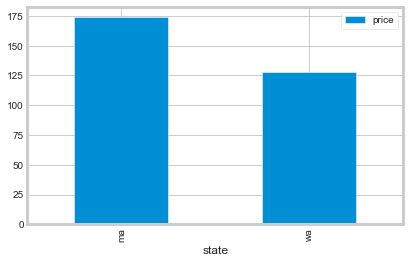

In [58]:
df[['state','price']].groupby('state').mean().plot(kind='bar')

In [59]:
#group the data by state and smart_location to get the mean price, last two are removed due to language 
location_price = df[['state','smart_location','price']].groupby(['state','smart_location']).mean()[0:-2]
location_price

price
state smart_location            
ma    allston          86.357143
      boston          176.620608
      brighton        107.250000
      brookline       135.888889
      cambridge       199.375000
      charlestown     262.533333
      dorchester       74.000000
      east            121.000000
      hyde             77.500000
      jamaica         159.000000
      ma               71.500000
      mattapan         85.000000
      milton           50.000000
      mission          85.000000
      newton           90.000000
      roslindale       99.714286
      roxbury          94.392857
      somerville       91.947368
      south           238.000000
      watertown        60.000000
      west             85.600000
      波士顿             100.000000
wa    ballard         116.000000
      phinney          60.000000
      seattle         128.030160

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text

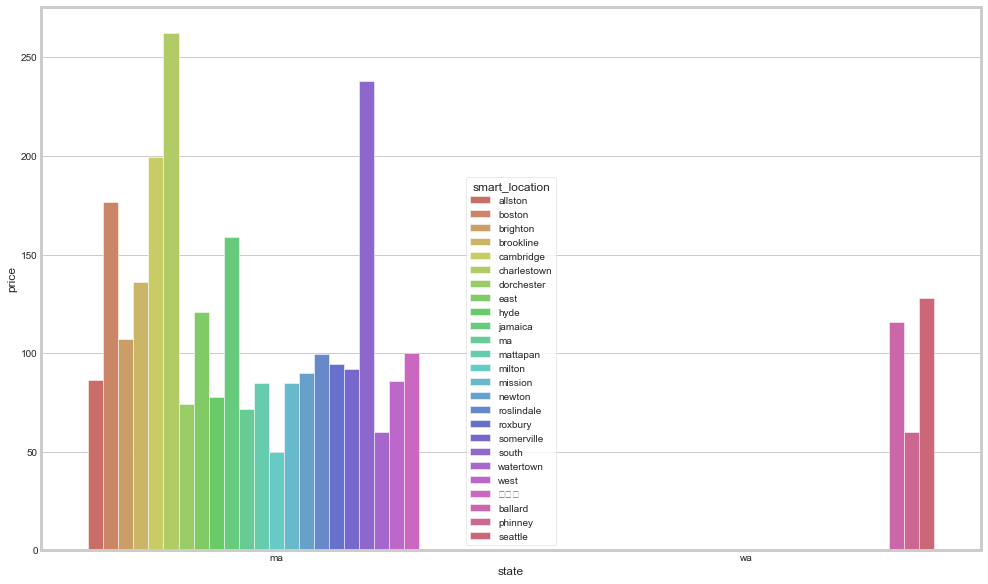

In [60]:
#reset the index for better visulization
location_price.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
#plot the data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
sns.barplot(x='state',y='price',hue='smart_location',palette='hls',data=location_price,orient='v',ax=ax)

**From what is shown above we can conclude that by average the listings in Massachusetts have a higher price tag than the listings in Washington by a difference of %26 with the most expensive being Charlestown/MA with an average of 262 dollars per night and the cheapest city being Milton/MA with an average of 50 dollars per night**

In [61]:
#fill the neighbourhood missing values from neighbourhood_cleansed
df['neighbourhood'].fillna(df['neighbourhood_cleansed'],inplace=True)

In [62]:
df['zipcode']

0       98119
1       98119
2       98119
3       98119
4       98119
        ...  
7398    02143
7399    02446
7400    02141
7401    02145
7402    02145
Name: zipcode, Length: 7403, dtype: object

In [63]:
#fix the zip_code
# get only the digits of the zipcode and change it back to str since 
# i want it to remain catagorical and replace null values with missing
df['zipcode'] = df['zipcode'].apply(lambda x : str(analysis_utils.get_number(x)) if type(x) == str else 'missing')

In [64]:
df['zipcode']

0       98119.0
1       98119.0
2       98119.0
3       98119.0
4       98119.0
         ...   
7398     2143.0
7399     2446.0
7400     2141.0
7401     2145.0
7402     2145.0
Name: zipcode, Length: 7403, dtype: object

In [65]:
# since the US zipcode consists of 5 digits we will try to fix the zipcode
list_a = [] #This list will store the new values for the zipcode
for i in df['zipcode']:
    x = i.split('.')[0] #split the zipcode by '.' and get the index [0]
    if x != 'missing': 
        if len(x) > 5 : 
            list_a.append(x[:5]) #slice the string to match the desired lenght then append
        elif len(x) < 5: 
            list_a.append((5-len(x))*'0'+x) #check how many digits is it missing then multiply it by str(0) then add it to the left side
        else:
            list_a.append(x) #else its the right number of digits
    else:
        list_a.append('missing')
        
df['zipcode'] = list_a

In [66]:
df['zipcode']

0       98119
1       98119
2       98119
3       98119
4       98119
        ...  
7398    02143
7399    02446
7400    02141
7401    02145
7402    02145
Name: zipcode, Length: 7403, dtype: object

In [67]:
# Here we will get the neighborhood mode and the mean price for each zip code
grouped_loc = df[['zipcode','neighbourhood','price']].groupby('zipcode')#Group the data by zipcode
zipcode_hood_p = [] # this list will save the grouped dataframes sepratly each in an index
#loop over the grouped items
for key, item in grouped_loc:
    zipcode_hood_p.append(grouped_loc.get_group(key))# append result to list 

zipcode_list = [] #This list will save the unique zipcode list 
neighbourhood_list = [] #This list will save the mode of neighbourhood for each zipcode
price_list = [] #This list will save the mean price for each zipcode

for i in range(0,70): #loop over the list using the index
    zipcode_list.append(zipcode_hood_p[i].mode()['zipcode'][0]) #get the zipcode
    neighbourhood_list.append(zipcode_hood_p[i].mode()['neighbourhood'][0]) #get the neighbourhood
    price_list.append(round(zipcode_hood_p[i].mean()['price'])) #get the avg price

#create a dataframe to include the zipcode and the the mode of each zipcode mode
df_ziphood = pd.DataFrame({'zipcode':zipcode_list,'neighbourhood':neighbourhood_list,'price':price_list})
df_ziphood.tail(50)

zipcode              neighbourhood  price
20   02131                 Roslindale   97.0
21   02132               West Roxbury  104.0
22   02134           Allston-Brighton  109.0
23   02135           Allston-Brighton  120.0
24   02136                  Hyde Park   89.0
25   02138                    Allston  222.0
26   02139                  Cambridge  190.0
27   02141                  Cambridge  150.0
28   02142                   Back Bay  270.0
29   02143                Charlestown   96.0
30   02145                 Somerville   90.0
31   02163           Allston-Brighton   87.0
32   02169                 Dorchester   25.0
33   02186                   Mattapan   50.0
34   02210               South Boston  313.0
35   02215             Fenway/Kenmore  226.0
36   02218                  South End  169.0
37   02445                  Brookline   93.0
38   02446                  Brookline  178.0
39   02467              Chestnut Hill   80.0
40   02472                   Downtown   60.0
41   21080          Downtown Crossing  334.0
42   21341           Allston-Brighton   80.0
43   98101  Central Business District  167.0
44   98102               Capitol Hill  127.0
45   98103                    Fremont  124.0
46   98104                 First Hill  135.0
47   98105        University District  107.0
48   98106             North Delridge   82.0
49   98107                    Ballard  130.0
50   98108          North Beacon Hill   84.0
51   98109                 Queen Anne  150.0
52   98112                    Stevens  135.0
53   98115                    Ravenna  112.0
54   98116              North Admiral  145.0
55   98117                    Ballard  111.0
56   98118              Columbia City   94.0
57   98119                 Queen Anne  166.0
58   98121                   Belltown  154.0
59   98122                      Minor  132.0
60   98125              Olympic Hills   89.0
61   98126               The Junction  123.0
62   98133                Bitter Lake   86.0
63   98134        Industrial District  207.0
64   98136                   Gatewood  138.0
65   98144          North Beacon Hill  105.0
66   98146              Arbor Heights   98.0
67   98177                  Broadview   99.0
68   98178              Rainier Beach   94.0
69   98199                   Magnolia  172.0

In [68]:
#change the zipcode to int
df_ziphood['zipcode'] = df_ziphood['zipcode'].apply(lambda x: int(x))

In [69]:
#Use the zipcode data read above to get the exact latitude, Longitude of the zipcode to place in a map
us_zip_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43191 entries, 0 to 43190
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zip                         43191 non-null  int64  
 1   City                        43191 non-null  object 
 2   State                       43191 non-null  object 
 3   Latitude                    43191 non-null  float64
 4   Longitude                   43191 non-null  float64
 5   Timezone                    43191 non-null  int64  
 6   Daylight savings time flag  43191 non-null  int64  
 7   geopoint                    43191 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ MB


In [70]:
us_zip_info.head()

Zip      City State   Latitude  Longitude  Timezone  \
0  71937      Cove    AR  34.398483  -94.39398        -6   
1  72044  Edgemont    AR  35.624351  -92.16056        -6   
2  56171  Sherburn    MN  43.660847  -94.74357        -6   
3  49430    Lamont    MI  43.010337  -85.89754        -5   
4  52585  Richland    IA  41.194129  -91.98027        -6   

   Daylight savings time flag             geopoint  
0                           1  34.398483,-94.39398  
1                           1  35.624351,-92.16056  
2                           1  43.660847,-94.74357  
3                           1  43.010337,-85.89754  
4                           1  41.194129,-91.98027

In [71]:
#merge the two datasets with intersection (left) to get our needed data
intersected_df = pd.merge(df_ziphood, us_zip_info, how='left',left_on='zipcode',right_on='Zip')
intersected_df.head(50)

zipcode              neighbourhood  price      Zip           City State  \
0      2108                Beacon Hill  230.0   2108.0         Boston    MA   
1      2109                  North End  239.0   2109.0         Boston    MA   
2      2110                  North End  274.0   2110.0         Boston    MA   
3      2111                  Chinatown  254.0   2111.0         Boston    MA   
4      2113                  North End  190.0   2113.0         Boston    MA   
5      2114                Beacon Hill  213.0   2114.0         Boston    MA   
6      2115                   Back Bay  195.0   2115.0         Boston    MA   
7      2116                   Back Bay  229.0   2116.0         Boston    MA   
8      2118                  South End  218.0   2118.0         Boston    MA   
9      2119                    Roxbury  126.0   2119.0         Boston    MA   
10     2120               Mission Hill  126.0   2120.0         Boston    MA   
11     2121                 Dorchester  101.0   2121.0         Boston    MA   
12     2122                 Dorchester  114.0   2122.0         Boston    MA   
13     2124                 Dorchester   81.0   2124.0         Boston    MA   
14     2125                 Dorchester   96.0   2125.0         Boston    MA   
15     2126                   Mattapan   81.0   2126.0       Mattapan    MA   
16     2127               South Boston  190.0   2127.0         Boston    MA   
17     2128                East Boston  120.0   2128.0         Boston    MA   
18     2129                Charlestown  222.0   2129.0    Charlestown    MA   
19     2130              Jamaica Plain  139.0   2130.0  Jamaica Plain    MA   
20     2131                 Roslindale   97.0   2131.0     Roslindale    MA   
21     2132               West Roxbury  104.0   2132.0   West Roxbury    MA   
22     2134           Allston-Brighton  109.0   2134.0        Allston    MA   
23     2135           Allston-Brighton  120.0   2135.0       Brighton    MA   
24     2136                  Hyde Park   89.0   2136.0      Hyde Park    MA   
25     2138                    Allston  222.0   2138.0      Cambridge    MA   
26     2139                  Cambridge  190.0   2139.0      Cambridge    MA   
27     2141                  Cambridge  150.0   2141.0      Cambridge    MA   
28     2142                   Back Bay  270.0   2142.0      Cambridge    MA   
29     2143                Charlestown   96.0   2143.0     Somerville    MA   
30     2145                 Somerville   90.0   2145.0     Somerville    MA   
31     2163           Allston-Brighton   87.0   2163.0         Boston    MA   
32     2169                 Dorchester   25.0   2169.0         Quincy    MA   
33     2186                   Mattapan   50.0   2186.0         Milton    MA   
34     2210               South Boston  313.0   2210.0         Boston    MA   
35     2215             Fenway/Kenmore  226.0   2215.0         Boston    MA   
36     2218                  South End  169.0      NaN            NaN   NaN   
37     2445                  Brookline   93.0   2445.0      Brookline    MA   
38     2446                  Brookline  178.0   2446.0      Brookline    MA   
39     2467              Chestnut Hill   80.0   2467.0  Chestnut Hill    MA   
40     2472                   Downtown   60.0   2472.0      Watertown    MA   
41    21080          Downtown Crossing  334.0  21080.0       Henryton    MD   
42    21341           Allston-Brighton   80.0      NaN            NaN   NaN   
43    98101  Central Business District  167.0  98101.0        Seattle    WA   
44    98102               Capitol Hill  127.0  98102.0        Seattle    WA   
45    98103                    Fremont  124.0  98103.0        Seattle    WA   
46    98104                 First Hill  135.0  98104.0        Seattle    WA   
47    98105        University District  107.0  98105.0        Seattle    WA   
48    98106             North Delridge   82.0  98106.0        Seattle    WA   
49    98107                    Ballard  130.0  98107.0

In [72]:
#remove the null values to apply to map
intersected_df = intersected_df[intersected_df['Latitude'].notnull()]

In [73]:
# define the map
city_map = folium.Map(location=[42.36, -71.058], zoom_start=3)
# define an instince of plugin
price = plugins.MarkerCluster().add_to(city_map)

#loop over the dataframe and get the Latitude,Longitude,price
for lat, lng, label, in zip(intersected_df['Latitude'],\
                            intersected_df['Longitude'], intersected_df['price']):
    folium.Marker(location=[lat, lng],icon=None,\
                  popup='The average price for this area is {}'.format(label)).add_to(price)

# display the map
city_map

**This map above shows us exactly what avg price each zipcode has and the neighborhood as well**

In [74]:
#delete unnassary columns
temp = ['street','country_code','city','neighbourhood_group_cleansed','neighbourhood_cleansed']
for i in temp:
    del df[i]

---
#### Host Information
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**host_id**|`int64`|clean|`int64`|
|**host_name**|`object`|replace null with none|`object`|
|**host_since**|`date_time`|replace null with median|`datetime64`|
|**host_response_time**|`object`|replace null with none|`object`|
|**host_response_rate**|`object`|replace from median|`float64`|
|**host_acceptance_rate**|`object`|replace from median|`float64`|
|**host_is_superhost**|`object`|replace with int bool|`int64`|
|**host_neighbourhood**|`object`|delete unnecessary|
|**host_year**|`int64`|created this new column to represent the year the host joined|`int64`|

In [75]:
temp = ['host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost']

In [76]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   host_id               7403 non-null   int64 
 1   host_name             7401 non-null   object
 2   host_since            7401 non-null   object
 3   host_response_time    6409 non-null   object
 4   host_response_rate    6409 non-null   object
 5   host_acceptance_rate  6159 non-null   object
 6   host_is_superhost     7401 non-null   object
dtypes: int64(1), object(6)
memory usage: 405.0+ KB


In [77]:
df[temp].head()

host_id host_name  host_since  host_response_time host_response_rate  \
0    956883     Maija  2011-08-11  within a few hours                96%   
1   5177328    Andrea  2013-02-21      within an hour                98%   
2  16708587      Jill  2014-06-12  within a few hours                67%   
3   9851441     Emily  2013-11-06                 NaN                NaN   
4   1452570     Emily  2011-11-29      within an hour               100%   

  host_acceptance_rate host_is_superhost  
0                 100%                 f  
1                 100%                 t  
2                 100%                 f  
3                  NaN                 f  
4                  NaN                 f

In [78]:
#group the host info to fill null values
grouped_host = df[['host_id','host_name','host_since','host_response_time','host_response_rate','host_acceptance_rate']].groupby('host_id')
host_info = []
for key, item in grouped_host:
    host_info.append(grouped_host.get_group(key))
    
#check the null values and validate using hosts other posts 
for i in host_info:
    print(i.head())

      host_id host_name  host_since  host_response_time host_response_rate  \
2184     4193   Jessica  2008-11-10  within a few hours                88%   
2190     4193   Jessica  2008-11-10  within a few hours                88%   
2192     4193   Jessica  2008-11-10  within a few hours                88%   
2194     4193   Jessica  2008-11-10  within a few hours                88%   

     host_acceptance_rate  
2184                 100%  
2190                 100%  
2192                 100%  
2194                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
7125     4240  Giuseppe  2008-11-11  within a few hours                90%   
7341     4240  Giuseppe  2008-11-11  within a few hours                90%   

     host_acceptance_rate  
7125                  78%  
7341                  78%  
      host_id host_name  host_since host_response_time host_response_rate  \
5362     4804     Frank  2008-12-03       within a day                94%

4731                  29%  
      host_id host_name  host_since  host_response_time host_response_rate  \
4050   174986    Robert  2010-07-20  within a few hours                90%   

     host_acceptance_rate  
4050                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1801   178552   Rebecca  2010-07-23     within an hour               100%   

     host_acceptance_rate  
1801                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5893   178829      John  2010-07-23                NaN                NaN   

     host_acceptance_rate  
5893                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3469   179030   Harriet  2010-07-24     within an hour               100%   

     host_acceptance_rate  
3469                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
168    179626     Susan  2010-07-24     within an

2632                 100%  
     host_id host_name  host_since  host_response_time host_response_rate  \
623   351623      E.J.  2011-01-18  within a few hours               100%   

    host_acceptance_rate  
623                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
3931   352441    Lillie  2011-01-18  within a few hours               100%   

     host_acceptance_rate  
3931                  33%  
     host_id host_name  host_since host_response_time host_response_rate  \
524   357277   Matthew  2011-01-22     within an hour                80%   

    host_acceptance_rate  
524                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
496   361961    Breeze  2011-01-25     within an hour                95%   

    host_acceptance_rate  
496                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5804   362507       Can  2011-01-25     within an hour     

1724                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1437   584774    Helene  2011-05-13                NaN                NaN   

     host_acceptance_rate  
1437                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3041   586610       Kim  2011-05-14                NaN                NaN   

     host_acceptance_rate  
3041                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3660   587302     Danni  2011-05-14  within a few hours               100%   

     host_acceptance_rate  
3660                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3255   589855    Johnny  2011-05-15     within an hour               100%   

     host_acceptance_rate  
3255                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
2096   594315      Jana  2011-05-16  within a fe

482                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
2781   900531      Clay  2011-08-01       within a day               100%   
2870   900531      Clay  2011-08-01       within a day               100%   

     host_acceptance_rate  
2781                 100%  
2870                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7340   911968  Gianluca  2011-08-02                NaN                NaN   

     host_acceptance_rate  
7340                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
4771   912631   Gregory  2011-08-02  within a few hours               100%   

     host_acceptance_rate  
4771                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
6597   914630      Bill  2011-08-03  within a few hours               100%   
6621   914630      Bill  2011-08-03  within a few hours               100%   

3854                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5393  1229497     Laura  2011-09-30                NaN                NaN   

     host_acceptance_rate  
5393                  NaN  
     host_id host_name  host_since  host_response_time host_response_rate  \
391  1230087     Megan  2011-09-30  within a few hours               100%   

    host_acceptance_rate  
391                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
4510  1231885     Emily  2011-10-01     within an hour               100%   

     host_acceptance_rate  
4510                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3797  1237248     Elise  2011-10-02     within an hour               100%   

     host_acceptance_rate  
3797                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
315  1243056    Andrew  2011-10-03     within an hour 

3650                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6788  1570388      Kayt  2012-01-05                NaN                NaN   

     host_acceptance_rate  
6788                  NaN  
     host_id host_name  host_since host_response_time host_response_rate  \
979  1577903       Jen  2012-01-07     within an hour               100%   

    host_acceptance_rate  
979                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5823  1587128    Daniel  2012-01-09                NaN                NaN   

     host_acceptance_rate  
5823                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5050  1592221     Sarah  2012-01-10       within a day                90%   

     host_acceptance_rate  
5050                  75%  
      host_id host_name  host_since host_response_time host_response_rate  \
2841  1592704     Karen  2012-01-10     within an hour 

7084                  70%  
      host_id host_name  host_since host_response_time host_response_rate  \
6070  1934182   Brendan  2012-03-16                NaN                NaN   

     host_acceptance_rate  
6070                  NaN  
      host_id       host_name  host_since host_response_time  \
2455  1938802  Jason And Susy  2012-03-17     within an hour   

     host_response_rate host_acceptance_rate  
2455               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3501  1939746   Justine  2012-03-17     within an hour               100%   

     host_acceptance_rate  
3501                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7201  1944123   Marketa  2012-03-17     within an hour               100%   

     host_acceptance_rate  
7201                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
4141  1956464     Maria  2012-03-18  a

3703                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5743  2319506      Jack  2012-05-08     within an hour               100%   

     host_acceptance_rate  
5743                  93%  
      host_id host_name  host_since host_response_time host_response_rate  \
2364  2323745    Leanne  2012-05-08     within an hour               100%   

     host_acceptance_rate  
2364                  NaN  
     host_id        host_name  host_since  host_response_time  \
671  2325108  Josh And Nicole  2012-05-08  within a few hours   

    host_response_rate host_acceptance_rate  
671               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6414  2327276      Asem  2012-05-09                NaN                NaN   

     host_acceptance_rate  
6414                  NaN  
     host_id host_name  host_since  host_response_time host_response_rate  \
365  2327457       Jen  2012-05-09  wit

2084               100%                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
602  2781551       Ron  2012-06-29     within an hour               100%   
810  2781551       Ron  2012-06-29     within an hour               100%   
934  2781551       Ron  2012-06-29     within an hour               100%   

    host_acceptance_rate  
602                 100%  
810                 100%  
934                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5722  2788083    Simone  2012-06-30                NaN                NaN   

     host_acceptance_rate  
5722                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
2007  2796016     Aexis  2012-07-01     within an hour               100%   
2046  2796016     Aexis  2012-07-01     within an hour               100%   

     host_acceptance_rate  
2007                 100%  
2046                 100%  
      host_id

679                  NaN  
     host_id          host_name  host_since host_response_time  \
977  3329218  Andrew And Amanda  2012-08-21                NaN   

    host_response_rate host_acceptance_rate  
977                NaN                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
7272  3333602      Roma  2012-08-21  a few days or more                33%   

     host_acceptance_rate  
7272                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7022  3351569   Monique  2012-08-23     within an hour               100%   

     host_acceptance_rate  
7022                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
3245  3352041     Lynda  2012-08-23  within a few hours               100%   

     host_acceptance_rate  
3245                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3031  3365116   Christy  2012-08-

4019                  63%  
      host_id host_name  host_since host_response_time host_response_rate  \
3128  3819432      Jane  2012-10-09     within an hour               100%   

     host_acceptance_rate  
3128                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1273  3830187       Meg  2012-10-10                NaN                NaN   

     host_acceptance_rate  
1273                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
2810  3839959    Jayson  2012-10-11       within a day                86%   

     host_acceptance_rate  
2810                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3877  3840038    Sidney  2012-10-11                NaN                NaN   

     host_acceptance_rate  
3877                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
5521  3842205    Nicolo  2012-10-11     within an h

7367                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1181  4299635     Robin  2012-12-02     within an hour               100%   

     host_acceptance_rate  
1181                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
5039  4307515  Milicent  2012-12-02       within a day                92%   

     host_acceptance_rate  
5039                  83%  
      host_id host_name  host_since host_response_time host_response_rate  \
1671  4308027     Trang  2012-12-02     within an hour               100%   
1681  4308027     Trang  2012-12-02     within an hour               100%   
1684  4308027     Trang  2012-12-02     within an hour               100%   

     host_acceptance_rate  
1671                 100%  
1681                 100%  
1684                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3097  4328101       Joe  2012-12-05     within an ho

2298                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
1198  5011779     Karin  2013-02-08     within an hour               100%   

     host_acceptance_rate  
1198                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1799  5014920      Jeff  2013-02-08                NaN                NaN   

     host_acceptance_rate  
1799                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3895  5028116     Jason  2013-02-09  within a few hours               100%   
3968  5028116     Jason  2013-02-09  within a few hours               100%   
4059  5028116     Jason  2013-02-09  within a few hours               100%   
4159  5028116     Jason  2013-02-09  within a few hours               100%   

     host_acceptance_rate  
3895                  56%  
3968                  56%  
4059                  56%  
4159                  56%  
      host_id host_

5757                  80%  
      host_id host_name  host_since host_response_time host_response_rate  \
1987  5525120    Esther  2013-03-19                NaN                NaN   

     host_acceptance_rate  
1987                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
3025  5525234   Ellwood  2013-03-19                NaN                NaN   

     host_acceptance_rate  
3025                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
4161  5539314      Toni  2013-03-19                NaN                NaN   

     host_acceptance_rate  
4161                  NaN  
     host_id host_name  host_since host_response_time host_response_rate  \
978  5544855      Ania  2013-03-20     within an hour               100%   

    host_acceptance_rate  
978                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3625  5548892     Chris  2013-03-20     within an hour 

254                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6606  6103425     Steve  2013-04-26     within an hour                94%   
6616  6103425     Steve  2013-04-26     within an hour                94%   
6630  6103425     Steve  2013-04-26     within an hour                94%   
6648  6103425     Steve  2013-04-26     within an hour                94%   
6717  6103425     Steve  2013-04-26     within an hour                94%   

     host_acceptance_rate  
6606                  99%  
6616                  99%  
6630                  99%  
6648                  99%  
6717                  99%  
      host_id host_name  host_since host_response_time host_response_rate  \
4755  6103953      Josh  2013-04-26     within an hour               100%   
4763  6103953      Josh  2013-04-26     within an hour               100%   
4768  6103953      Josh  2013-04-26     within an hour               100%   
4970  6103953      Josh  2013-04-2

      host_id host_name  host_since host_response_time host_response_rate  \
2011  6622693    Teresa  2013-05-28     within an hour                90%   

     host_acceptance_rate  
2011                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
7332  6636693        Yi  2013-05-29     within an hour               100%   

     host_acceptance_rate  
7332                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
311  6645401      Jess  2013-05-29     within an hour               100%   

    host_acceptance_rate  
311                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1716  6645576     Janet  2013-05-29     within an hour               100%   

     host_acceptance_rate  
1716                 100%  
      host_id                host_name  host_since  host_response_time  \
3306  6654033  April, Mike, And Maggie  2013-05-30  within a few hours   

     host_r

3887                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3358  7402289      Leia  2013-07-10     within an hour               100%   

     host_acceptance_rate  
3358                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6478  7408122     Thanh  2013-07-10     within an hour               100%   

     host_acceptance_rate  
6478                  94%  
      host_id  host_name  host_since host_response_time host_response_rate  \
4923  7410606  Magdalena  2013-07-10                NaN                NaN   

     host_acceptance_rate  
4923                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
4147  7419610     Ariel  2013-07-11  within a few hours               100%   

     host_acceptance_rate  
4147                 100%  
      host_id  host_name  host_since  host_response_time host_response_rate  \
4989  7422781  Christine  2013-07-11  within 

2015                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3645  8117658   Marilyn  2013-08-12                NaN                NaN   

     host_acceptance_rate  
3645                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3545  8118817     Tracy  2013-08-12  within a few hours               100%   

     host_acceptance_rate  
3545                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
6390  8130814     Lison  2013-08-13       within a day               100%   
6477  8130814     Lison  2013-08-13       within a day               100%   

     host_acceptance_rate  
6390                 100%  
6477                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
2670  8136493     Grant  2013-08-13     within an hour               100%   

     host_acceptance_rate  
2670                 100%  
      host_id host_na

3847                  89%  
      host_id host_name  host_since  host_response_time host_response_rate  \
1618  8838512     Sarah  2013-09-14  within a few hours               100%   

     host_acceptance_rate  
1618                 100%  
      host_id      host_name  host_since host_response_time  \
2383  8849839  Amelia &  Jay  2013-09-15     within an hour   

     host_response_rate host_acceptance_rate  
2383               100%                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
3335  8873662       Amy  2013-09-16                NaN                NaN   

     host_acceptance_rate  
3335                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
3852  8879967    Joanne  2013-09-16  within a few hours               100%   

     host_acceptance_rate  
3852                  71%  
      host_id host_name  host_since host_response_time host_response_rate  \
1862  8880117         L  2013-09-16  

964                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
6104  9529655   Suzanne  2013-10-20  within a few hours               100%   
6171  9529655   Suzanne  2013-10-20  within a few hours               100%   

     host_acceptance_rate  
6104                  50%  
6171                  50%  
     host_id host_name  host_since host_response_time host_response_rate  \
279  9533123       Pam  2013-10-20     within an hour               100%   

    host_acceptance_rate  
279                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
1726  9545321      Fran  2013-10-21     within an hour               100%   

     host_acceptance_rate  
1726                 100%  
     host_id host_name  host_since  host_response_time host_response_rate  \
840  9555890   Melissa  2013-10-21  within a few hours               100%   
864  9555890   Melissa  2013-10-21  within a few hours               100%   
888  

4582                   0%  
       host_id          host_name  host_since host_response_time  \
6954  10252474  Christopher&Dylan  2013-11-25     within an hour   

     host_response_rate host_acceptance_rate  
6954               100%                  79%  
       host_id host_name  host_since host_response_time host_response_rate  \
6272  10258834     Jared  2013-11-25       within a day               100%   

     host_acceptance_rate  
6272                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1215  10260570    Adrian  2013-11-25  within a few hours                83%   

     host_acceptance_rate  
1215                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6729  10264055      Elle  2013-11-25  within a few hours                90%   

     host_acceptance_rate  
6729                  81%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6604  10273324    S

       host_id    host_name  host_since host_response_time host_response_rate  \
6352  11189145  Christopher  2014-01-10                NaN                NaN   

     host_acceptance_rate  
6352                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2823  11194155    Brooke  2014-01-11     within an hour               100%   

     host_acceptance_rate  
2823                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5687  11206328   Natasha  2014-01-11       within a day                90%   

     host_acceptance_rate  
5687                  77%  
       host_id host_name  host_since host_response_time host_response_rate  \
2127  11206862     Tammi  2014-01-11     within an hour               100%   

     host_acceptance_rate  
2127                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3634  11210607      Shan  2014-01-11     within an hour         

3324                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5384  12129722      Lais  2014-02-10     within an hour               100%   

     host_acceptance_rate  
5384                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3690  12132989   Christy  2014-02-10                NaN                NaN   

     host_acceptance_rate  
3690                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
4165  12150111   A And L  2014-02-11  within a few hours               100%   

     host_acceptance_rate  
4165                  82%  
       host_id     host_name  host_since host_response_time  \
3670  12156808  Mandy & Andy  2015-06-09                NaN   

     host_response_rate host_acceptance_rate  
3670                NaN                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4045  12164071   Cynthia  2014-0

6849               100%                  99%  
      host_id   host_name  host_since  host_response_time host_response_rate  \
944  13158974  Tim & Ryan  2014-03-15  within a few hours                89%   

    host_acceptance_rate  
944                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2939  13166405    Philip  2014-03-15     within an hour               100%   

     host_acceptance_rate  
2939                 100%  
      host_id host_name  host_since  host_response_time host_response_rate  \
918  13200012     Randy  2014-03-16  within a few hours               100%   

    host_acceptance_rate  
918                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1046  13200167    Kumail  2014-03-16     within an hour               100%   
1052  13200167    Kumail  2014-03-16     within an hour               100%   
1322  13200167    Kumail  2014-03-16     within an hour               100%   

 

3465                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4450  14131690     Linda  2014-04-10     within an hour               100%   

     host_acceptance_rate  
4450                  89%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5576  14133713      Katy  2014-04-10  within a few hours                83%   

     host_acceptance_rate  
5576                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1115  14138534      Jill  2014-04-10  within a few hours               100%   

     host_acceptance_rate  
1115                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3764  14140094       Liz  2014-04-10     within an hour               100%   

     host_acceptance_rate  
3764                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4198  14140959    Juliet  2014-04-10  

5511                 100%  
     host_id host_name  host_since host_response_time host_response_rate  \
56  15155647     Shiri  2014-05-06       within a day                70%   

   host_acceptance_rate  
56                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7016  15166663      Tomo  2014-05-06                NaN                NaN   

     host_acceptance_rate  
7016                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
4670  15168012  Andreina  2014-05-06  within a few hours               100%   

     host_acceptance_rate  
4670                   0%  
      host_id host_name  host_since  host_response_time host_response_rate  \
568  15171111      Paul  2014-05-06  a few days or more                33%   

    host_acceptance_rate  
568                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4038  15172911       Zoe  2014-05-06       within 

4023                 100%  
       host_id    host_name  host_since  host_response_time  \
3869  16343599  Ella & Will  2014-06-03  within a few hours   

     host_response_rate host_acceptance_rate  
3869                90%                  94%  
       host_id host_name  host_since host_response_time host_response_rate  \
4211  16375951       Bec  2014-06-04                NaN                NaN   

     host_acceptance_rate  
4211                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4060  16379445     Kelly  2014-06-04                NaN                NaN   

     host_acceptance_rate  
4060                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1914  16380844     Renee  2014-06-04       within a day               100%   

     host_acceptance_rate  
1914                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
3848  16398126     Chris  2014-06

6127                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5443  17409171      Ilya  2014-06-29  within a few hours               100%   

     host_acceptance_rate  
5443                  87%  
       host_id host_name  host_since host_response_time host_response_rate  \
2663  17433748    Adrian  2014-06-30     within an hour               100%   

     host_acceptance_rate  
2663                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2012  17469341     Chris  2014-06-30     within an hour               100%   

     host_acceptance_rate  
2012                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3608  17471347      Seth  2014-06-30  within a few hours               100%   

     host_acceptance_rate  
3608                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
556  17473989   Michael  2014-06-30    

619                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5852  18477814     Karen  2014-07-20     within an hour               100%   

     host_acceptance_rate  
5852                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
1831  18478539  Elizabeth  2014-07-20       within a day               100%   

     host_acceptance_rate  
1831                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
6652  18479599  Agnieszka  2014-07-20     within an hour               100%   
6700  18479599  Agnieszka  2014-07-20     within an hour               100%   
6705  18479599  Agnieszka  2014-07-20     within an hour               100%   
6714  18479599  Agnieszka  2014-07-20     within an hour               100%   
6757  18479599  Agnieszka  2014-07-20     within an hour               100%   

     host_acceptance_rate  
6652                  56%  
6700          

4311                  94%  
       host_id host_name  host_since host_response_time host_response_rate  \
6466  19509044      Erin  2014-08-05     within an hour               100%   

     host_acceptance_rate  
6466                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6496  19520294     Peter  2014-08-05  within a few hours               100%   

     host_acceptance_rate  
6496                 100%  
      host_id  host_name  host_since host_response_time host_response_rate  \
112  19533935  Stephanie  2014-08-05       within a day                80%   

    host_acceptance_rate  
112                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7159  19548932       Joe  2014-08-06     within an hour               100%   
7173  19548932       Joe  2014-08-06     within an hour               100%   
7200  19548932       Joe  2014-08-06     within an hour               100%   
7227  19548932       

6821                  99%  
       host_id host_name  host_since host_response_time host_response_rate  \
1929  20448703  Jennifer  2014-08-23     within an hour                94%   
1930  20448703  Jennifer  2014-08-23     within an hour                94%   
1939  20448703  Jennifer  2014-08-23     within an hour                94%   
1944  20448703  Jennifer  2014-08-23     within an hour                94%   
1954  20448703  Jennifer  2014-08-23     within an hour                94%   

     host_acceptance_rate  
1929                 100%  
1930                 100%  
1939                 100%  
1944                 100%  
1954                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1035  20450031       Ken  2014-08-23     within an hour                94%   

     host_acceptance_rate  
1035                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
4616  20454595  Margarita  2014-08-24     w

5357                  88%  
      host_id host_name  host_since host_response_time host_response_rate  \
229  21616710  Courtney  2014-09-21     within an hour               100%   

    host_acceptance_rate  
229                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1054  21640303     Chris  2014-09-22       within a day               100%   

     host_acceptance_rate  
1054                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3948  21644095     David  2014-09-22     within an hour               100%   
4152  21644095     David  2014-09-22     within an hour               100%   

     host_acceptance_rate  
3948                  93%  
4152                  93%  
       host_id   host_name  host_since host_response_time host_response_rate  \
7364  21647935  Ivan / Kim  2014-09-22     within an hour               100%   

     host_acceptance_rate  
7364                  93%  
       host_id

5848                  72%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1405  22611417     Nafis  2014-10-16  within a few hours                75%   

     host_acceptance_rate  
1405                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3721  22619582    Paloma  2014-10-16     within an hour               100%   

     host_acceptance_rate  
3721                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1180  22680126     Sally  2014-10-18       within a day               100%   

     host_acceptance_rate  
1180                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6365  22683865   Richard  2014-10-18                NaN                NaN   

     host_acceptance_rate  
6365                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3536  22698112       Shu  2014-10-18    

5466                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
5041  23785538  Alejandra  2014-11-15                NaN                NaN   

     host_acceptance_rate  
5041                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
248   23792018      Roda  2014-11-15     within an hour               100%   
277   23792018      Roda  2014-11-15     within an hour               100%   
3180  23792018      Roda  2014-11-15     within an hour               100%   
3188  23792018      Roda  2014-11-15     within an hour               100%   
3489  23792018      Roda  2014-11-15     within an hour               100%   

     host_acceptance_rate  
248                  100%  
277                  100%  
3180                 100%  
3188                 100%  
3489                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
245  23822173   Supriya  2014-11-16     wit

3209                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3407  24803728     Chris  2014-12-13     within an hour               100%   

     host_acceptance_rate  
3407                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3134  24825213       Lee  2014-12-14     within an hour               100%   

     host_acceptance_rate  
3134                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2548  24843788     Kelly  2014-12-14     within an hour               100%   

     host_acceptance_rate  
2548                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3401  24892993     Jamie  2014-12-16       within a day               100%   

     host_acceptance_rate  
3401                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2822  24902894      Luan  2014-12-16     w

1445                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1617  25999682    Coleen  2015-01-12                NaN                NaN   

     host_acceptance_rate  
1617                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1397  26002146  Cristian  2015-01-12                NaN                NaN   

     host_acceptance_rate  
1397                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2423  26003146     Mercy  2015-01-12       within a day                60%   
2435  26003146     Mercy  2015-01-12       within a day                60%   
3250  26003146     Mercy  2015-01-12       within a day                60%   

     host_acceptance_rate  
2423                 100%  
2435                 100%  
3250                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4031  26023138    Sherry  2015-01-12       

1981                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2068  27329128     Jorge  2015-02-06                NaN                NaN   
2113  27329128     Jorge  2015-02-06                NaN                NaN   

     host_acceptance_rate  
2068                  NaN  
2113                  NaN  
      host_id host_name  host_since  host_response_time host_response_rate  \
625  27339584   Caitlyn  2015-02-06  within a few hours               100%   
628  27339584   Caitlyn  2015-02-06  within a few hours               100%   

    host_acceptance_rate  
625                 100%  
628                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6311  27425562       Ben  2015-02-08       within a day               100%   

     host_acceptance_rate  
6311                 100%  
       host_id    host_name  host_since host_response_time host_response_rate  \
5655  27446821  Jean-Pierre  2015-02-08    

125                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2496  28772841     Linda  2015-03-04     within an hour                90%   

     host_acceptance_rate  
2496                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4592  28820575      S.P.  2015-03-05     within an hour               100%   
4623  28820575      S.P.  2015-03-05     within an hour               100%   
4630  28820575      S.P.  2015-03-05     within an hour               100%   
4639  28820575      S.P.  2015-03-05     within an hour               100%   
4693  28820575      S.P.  2015-03-05     within an hour               100%   

     host_acceptance_rate  
4592                 100%  
4623                 100%  
4630                 100%  
4639                 100%  
4693                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
1203  28822480      Ella  2015-03-05  a few 

2388                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3924  30314324    Eileen  2015-03-30  within a few hours               100%   

     host_acceptance_rate  
3924                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2637  30318175     Nadia  2015-03-30       within a day                67%   

     host_acceptance_rate  
2637                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2747  30322585    Nicole  2015-03-31       within a day               100%   

     host_acceptance_rate  
2747                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6674  30342817     Piter  2015-03-31     within an hour               100%   
6689  30342817     Piter  2015-03-31     within an hour               100%   

     host_acceptance_rate  
6674                 100%  
6689                 100%  
       host_

207                 100%  
      host_id host_name  host_since host_response_time host_response_rate  \
950  32059522    Renato  2015-04-27                NaN                NaN   

    host_acceptance_rate  
950                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2865  32069191     David  2015-04-27     within an hour               100%   

     host_acceptance_rate  
2865                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1949  32069664   Jessica  2015-04-27     within an hour               100%   

     host_acceptance_rate  
1949                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3965  32071442     Sarah  2015-04-27  within a few hours                92%   

     host_acceptance_rate  
3965                  94%  
       host_id host_name  host_since host_response_time host_response_rate  \
7060  32079650  Danielle  2015-04-27         

6775                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2480  33676845     Jesse  2015-05-18       within a day                67%   

     host_acceptance_rate  
2480                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6022  33687245     Elisa  2015-05-18                NaN                NaN   

     host_acceptance_rate  
6022                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5102  33688127     Eytan  2015-05-18                NaN                NaN   

     host_acceptance_rate  
5102                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
1142  33698546     Stone  2015-05-18  within a few hours               100%   

     host_acceptance_rate  
1142                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3065  33705141     Becca  2015-05-19    

383                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3242  35242626   Michael  2015-06-07                NaN                NaN   

     host_acceptance_rate  
3242                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
308   35246915     Jaime  2015-06-07       within a day                58%   
3387  35246915     Jaime  2015-06-07       within a day                58%   

     host_acceptance_rate  
308                  100%  
3387                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
6547  35275808     Davis  2015-06-08  within a few hours               100%   

     host_acceptance_rate  
6547                  96%  
       host_id host_name  host_since host_response_time host_response_rate  \
3289  35316923     James  2015-06-08     within an hour               100%   
3290  35316923     James  2015-06-08     within an hour               

616                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
1943  36633617     Angie  2015-06-24       within a day               100%   
1952  36633617     Angie  2015-06-24       within a day               100%   

     host_acceptance_rate  
1943                 100%  
1952                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2172  36652734   Jolanta  2015-06-24     within an hour               100%   

     host_acceptance_rate  
2172                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2118  36654052    Jeremy  2015-06-24     within an hour               100%   

     host_acceptance_rate  
2118                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4744  36660602    Amanda  2015-06-24     within an hour               100%   

     host_acceptance_rate  
4744                  30%  
       host_id 

2750                 100%  
      host_id  host_name  host_since host_response_time host_response_rate  \
784  37938910  Magdalena  2015-07-08     within an hour               100%   

    host_acceptance_rate  
784                  NaN  
      host_id         host_name  host_since host_response_time  \
761  37952534  Scott And Delmis  2015-07-09     within an hour   
768  37952534  Scott And Delmis  2015-07-09     within an hour   

    host_response_rate host_acceptance_rate  
761               100%                 100%  
768               100%                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6873  38001139    Robert  2015-07-09                NaN                NaN   

     host_acceptance_rate  
6873                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
812  38014746   Desiree  2015-07-09       within a day                89%   

    host_acceptance_rate  
812                 100%  
  

1118                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2335  39525512  Cristina  2015-07-25     within an hour               100%   

     host_acceptance_rate  
2335                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4433  39536288      Alex  2015-07-25  within a few hours                93%   

     host_acceptance_rate  
4433                  96%  
      host_id host_name  host_since host_response_time host_response_rate  \
146  39549545      Alex  2015-07-25                NaN                NaN   

    host_acceptance_rate  
146                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
5962  39584749   Shemesh  2015-07-26  within a few hours               100%   

     host_acceptance_rate  
5962                 100%  
       host_id  host_name  host_since host_response_time host_response_rate  \
2743  39607395  Elizabeth  2015-07-26    

727                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5709  41328752   Patrick  2015-08-12                NaN                NaN   

     host_acceptance_rate  
5709                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
1126  41336393      Tara  2015-08-13       within a day               100%   

     host_acceptance_rate  
1126                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2648  41379323         E  2015-08-13     within an hour               100%   
2776  41379323         E  2015-08-13     within an hour               100%   
2951  41379323         E  2015-08-13     within an hour               100%   

     host_acceptance_rate  
2648                 100%  
2776                 100%  
2951                 100%  
       host_id   host_name  host_since host_response_time host_response_rate  \
5654  41383849  Hweekyoung  2015-08-13    

5408                  96%  
       host_id host_name  host_since host_response_time host_response_rate  \
6233  42847628       Wan  2015-08-29                NaN                NaN   

     host_acceptance_rate  
6233                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
3203  42865055    Brooks  2015-08-29       within a day                89%   

     host_acceptance_rate  
3203                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4809  42868503    Thiago  2015-08-29       within a day                80%   

     host_acceptance_rate  
4809                  55%  
       host_id host_name  host_since host_response_time host_response_rate  \
1845  42873852   Melissa  2015-08-30     within an hour               100%   

     host_acceptance_rate  
1845                 100%  
       host_id     host_name  host_since host_response_time  \
3327  42931551  Todd & Chris  2015-08-30                N

514                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6913  44095138       Leo  2015-09-13       within a day                50%   

     host_acceptance_rate  
6913                  75%  
      host_id host_name  host_since host_response_time host_response_rate  \
692  44101586    Regina  2015-09-13       within a day               100%   

    host_acceptance_rate  
692                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2604  44110991     Haley  2015-09-13                NaN                NaN   

     host_acceptance_rate  
2604                  NaN  
      host_id host_name  host_since host_response_time host_response_rate  \
513  44157998   Yasmeen  2015-09-14     within an hour               100%   

    host_acceptance_rate  
513                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4621  44162105     Betsy  2015-09-14  within a few

5895                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
2755  45834046    Daniel  2015-10-05  within a few hours               100%   

     host_acceptance_rate  
2755                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5979  45835636      John  2015-10-05       within a day                92%   

     host_acceptance_rate  
5979                  54%  
       host_id host_name  host_since  host_response_time host_response_rate  \
5300  45840601      Raul  2015-10-05  within a few hours               100%   

     host_acceptance_rate  
5300                  64%  
       host_id host_name  host_since host_response_time host_response_rate  \
6904  45851126     Kelly  2015-10-05       within a day               100%   

     host_acceptance_rate  
6904                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
2938  45859720      Brad  2015-10-05  

4013                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
2257  47593725     Kelly  2015-10-27       within a day                70%   
2269  47593725     Kelly  2015-10-27       within a day                70%   

     host_acceptance_rate  
2257                 100%  
2269                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
5160  47618394     Liesl  2015-10-28     within an hour               100%   
5290  47618394     Liesl  2015-10-28     within an hour               100%   

     host_acceptance_rate  
5160                 100%  
5290                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3544  47638002     Devon  2015-10-28       within a day               100%   

     host_acceptance_rate  
3544                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
2374  47653354   Lulsged  2015-10-28       

7333                  77%  
      host_id host_name  host_since  host_response_time host_response_rate  \
258  49560117   Charles  2015-11-21  within a few hours               100%   

    host_acceptance_rate  
258                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
4089  49565531     Maria  2015-11-21  within a few hours                70%   

     host_acceptance_rate  
4089                  75%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4117  49640474     Nancy  2015-11-22  within a few hours               100%   

     host_acceptance_rate  
4117                  92%  
       host_id host_name  host_since host_response_time host_response_rate  \
3053  49644871     Linda  2015-11-22                NaN                NaN   

     host_acceptance_rate  
3053                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
7259  49651994      Mark  2015-11-22    

4124                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6561  52187617     David  2015-12-24     within an hour                92%   
6569  52187617     David  2015-12-24     within an hour                92%   

     host_acceptance_rate  
6561                 100%  
6569                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
3940  52274002     Julia  2015-12-26     within an hour               100%   

     host_acceptance_rate  
3940                  67%  
       host_id host_name  host_since host_response_time host_response_rate  \
6501  52311253     Amita  2015-12-26                NaN                NaN   

     host_acceptance_rate  
6501                  NaN  
       host_id host_name  host_since  host_response_time host_response_rate  \
7171  52364711      Niki  2015-12-26  within a few hours               100%   

     host_acceptance_rate  
7171                  67%  
       host_

6362                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4877  61279591      Mike  2016-03-02  within a few hours               100%   

     host_acceptance_rate  
4877                  70%  
       host_id host_name  host_since host_response_time host_response_rate  \
6407  61322326    Phoebe  2016-03-02                NaN                NaN   

     host_acceptance_rate  
6407                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5484  61523768     James  2016-03-04     within an hour               100%   

     host_acceptance_rate  
5484                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4523  61571632     Trish  2016-03-04       within a day               100%   

     host_acceptance_rate  
4523                   0%  
       host_id host_name  host_since host_response_time host_response_rate  \
4672  61701374    Jasiya  2016-03-05    

6338                  67%  
       host_id host_name  host_since  host_response_time host_response_rate  \
4073  69873384     Jason  2016-05-01  within a few hours                90%   

     host_acceptance_rate  
4073                  82%  
       host_id host_name  host_since host_response_time host_response_rate  \
6045  69884462      Syed  2016-05-01     within an hour               100%   

     host_acceptance_rate  
6045                  92%  
       host_id host_name  host_since host_response_time host_response_rate  \
5532  69976103    Laurie  2016-05-02                NaN                NaN   

     host_acceptance_rate  
5532                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6300  70007887      Liam  2016-05-02                NaN                NaN   

     host_acceptance_rate  
6300                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
5997  70018264      Alan  2016-05-02    

4130                 100%  
       host_id host_name  host_since  host_response_time host_response_rate  \
3978  79610778   Kristen  2016-06-24  within a few hours                70%   

     host_acceptance_rate  
3978                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6822  79897849     Jones  2016-06-25     within an hour               100%   

     host_acceptance_rate  
6822                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6935  80100053      Bret  2016-06-26     within an hour               100%   

     host_acceptance_rate  
6935                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
7298  80361500     Danny  2016-06-27     within an hour               100%   

     host_acceptance_rate  
7298                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
4717  80390842     Kandi  2016-06-28    

7392                 100%  
       host_id host_name  host_since host_response_time host_response_rate  \
6339  91968083   Maureen  2016-08-26                NaN                NaN   

     host_acceptance_rate  
6339                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
6113  92196747      Neza  2016-08-27                NaN                NaN   

     host_acceptance_rate  
6113                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4357  92648590      Paul  2016-08-30                NaN                NaN   

     host_acceptance_rate  
4357                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
7379  92650841     Chloe  2016-08-30                NaN                NaN   

     host_acceptance_rate  
7379                  NaN  
       host_id host_name  host_since host_response_time host_response_rate  \
4839  92663980      Fadi  2016-08-30      

**Since null values are consitstent through out all hosts postings we have to do it manually**

In [79]:
df[temp].isnull().sum()

host_id                    0
host_name                  2
host_since                 2
host_response_time       994
host_response_rate       994
host_acceptance_rate    1244
host_is_superhost          2
dtype: int64

In [80]:
# fill the host name null values with none
df['host_name'].fillna('none',inplace = True)

In [81]:
# change host_since to date_time format
df['host_since']= pd.to_datetime(df['host_since'])
# fill missing values with the mode since only two are missing
df['host_since'].fillna(df['host_since'].mode()[0],inplace = True)

In [82]:
# fill host_response_time with unknown since we don't know response time
df['host_response_time'].fillna('unknown',inplace = True)

In [83]:
# remove anything other than numbers
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: analysis_utils.get_number(x) if type(x) == str else None)

Tukeys method number of outliers is 2292
90% confidence interval has 30 values between 95.0 and 95.0


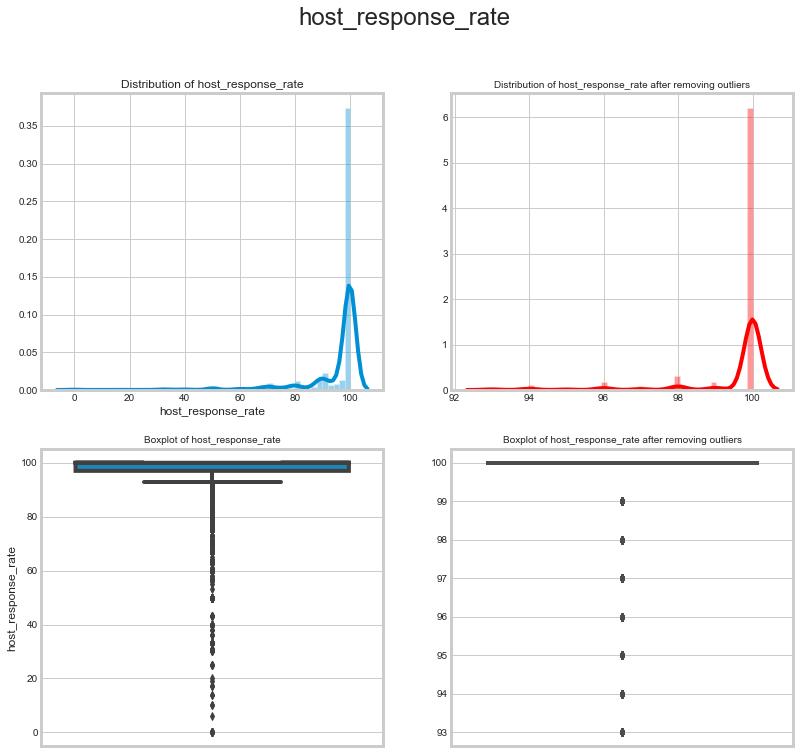

In [84]:
analysis_utils.no_outlier('host_response_rate',df)

**From the graph above we can see that the distribution is strongly left-skewed even after removing the outliers, therefore, replacing the null values with the median seems like the logical thing to do** 

In [85]:
# fill the missing value with the median
df['host_response_rate'].fillna(df['host_response_rate'].median(),inplace = True)

In [86]:
# remove anything other than numbers
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(lambda x: int(x.strip('%')) if type(x) == str else None)

Tukeys method number of outliers is 2331
90% confidence interval has 34 values between 92.0 and 92.0


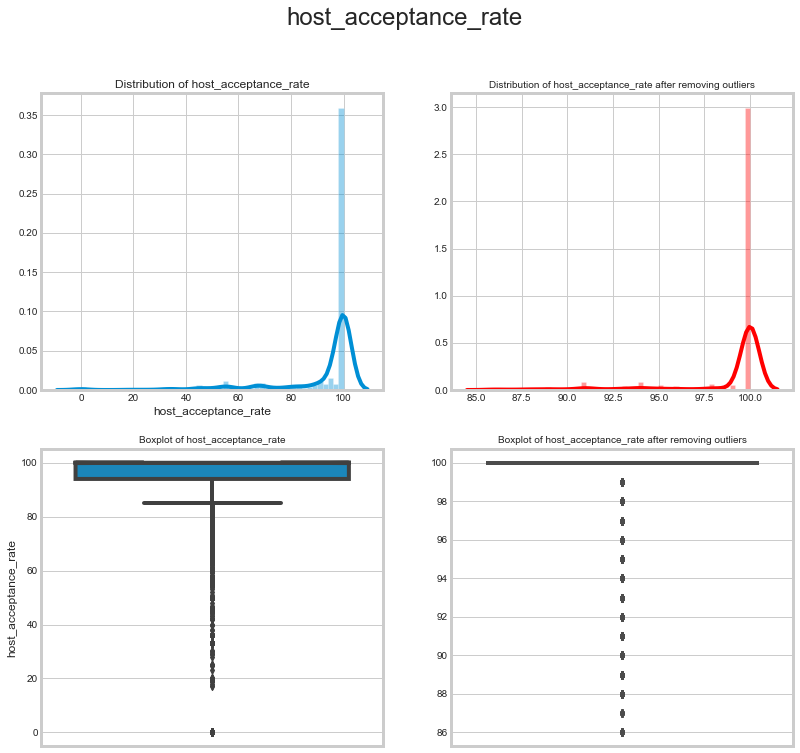

In [87]:
analysis_utils.no_outlier('host_acceptance_rate',df)

**Same thing as above the distribution is strongly skewed therefore replacing the missing values with the median seems like the logical thing to do**

In [88]:
# fill the missing value with the median
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median(), inplace = True)

In [89]:
# change t , f values to boolean 0 , 1
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x : 1 if x == 't' else 0)

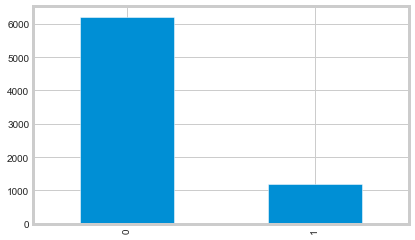

In [90]:
df['host_is_superhost'].value_counts().plot(kind='bar')

In [91]:
#delete unnacassary columns
del df['host_neighbourhood']

In [92]:
#create a new column of year when hosts joined the platform
df['host_year'] = df['host_since'].apply(lambda x : x.year)

In [93]:
df['host_year'].value_counts()

2015    1994
2014    1736
2013    1351
2012     839
2011     620
2016     438
2010     244
2009     174
2008       7
Name: host_year, dtype: int64

**Now I will check weather the older host who have been using the platform for a while have a price difference then new host joiners**

In [94]:
#group the columns by host_year
grouped_host_year = df[['host_year','price']].groupby('host_year')
host_price = []
#loop over the grouped items
for key, item in grouped_host_year:
    host_price.append(grouped_host_year.get_group(key))# append result to list 

host_year_ = [] #save values of unique years (each group)
year_price = [] #save the avg price for the host year group

for i in range(0,len(host_price)): #loop over the list using the index
    host_year_.append(host_price[i].mode()['host_year'][0]) #get the year
    year_price.append(round(host_price[i].mean()['price'])) #get the avg price

#create a dataframe to include the year and the the avg_price
df_year_price = pd.DataFrame({'year':host_year_,'avg_price':year_price})
df_year_price.head(10)

year  avg_price
0  2008       89.0
1  2009      216.0
2  2010      148.0
3  2011      153.0
4  2012      142.0
5  2013      151.0
6  2014      145.0
7  2015      148.0
8  2016      165.0

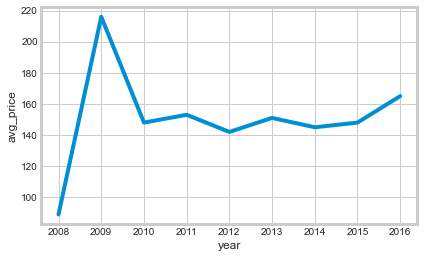

In [95]:
sns.lineplot(x='year',y='avg_price',data=df_year_price)

**Hosts who have been using the platform since its launch have the lowest avg listing price of 89 dollers per night. Whats strange is that hosts who joined the platform one year later have the highest avg listing price of 216**

---
#### Host profile info
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**host_listings_count**|`float64`|replace null with mean|`int64`|
|**host_total_listings_count**|`float64`|Delete to avoid redundency|
|**host_has_profile_pic**|`object`|change to bool and replace null with 0|`int64`|
|**host_identity_verified**|`object`|change to bool and replace null with 0|`int64`|
|**host_verifications**|`object`|Replace with the number of verifications|`int64`|
|**market**|`object`|delete to avoid redundency|


In [96]:
test = ['host_listings_count','host_total_listings_count','host_has_profile_pic',\
        'host_identity_verified','host_verifications','market']

df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_listings_count        7401 non-null   float64
 1   host_total_listings_count  7401 non-null   float64
 2   host_has_profile_pic       7401 non-null   object 
 3   host_identity_verified     7401 non-null   object 
 4   host_verifications         7403 non-null   object 
 5   market                     7389 non-null   object 
dtypes: float64(2), object(4)
memory usage: 347.1+ KB


In [97]:
df[test].head()

host_listings_count  host_total_listings_count host_has_profile_pic  \
0                  3.0                        3.0                    t   
1                  6.0                        6.0                    t   
2                  2.0                        2.0                    t   
3                  1.0                        1.0                    t   
4                  2.0                        2.0                    t   

  host_identity_verified                                 host_verifications  \
0                      t               ['email', 'phone', 'reviews', 'kba']   
1                      t  ['email', 'phone', 'facebook', 'linkedin', 're...   
2                      t   ['email', 'phone', 'google', 'reviews', 'jumio']   
3                      t  ['email', 'phone', 'facebook', 'reviews', 'jum...   
4                      t   ['email', 'phone', 'facebook', 'reviews', 'kba']   

    market  
0  Seattle  
1  Seattle  
2  Seattle  
3  Seattle  
4  Seattle

In [98]:
#get the null values 
df['host_listings_count'].isnull().sum()

2

In [99]:
#get info
df['host_listings_count'].value_counts()

1.0      3795
2.0      1118
3.0       481
4.0       308
5.0       183
749.0     136
6.0       115
7.0       113
558.0      79
11.0       76
34.0       67
313.0      61
363.0      58
37.0       57
18.0       52
8.0        51
52.0       50
24.0       48
48.0       46
22.0       45
10.0       40
169.0      39
9.0        38
21.0       38
12.0       36
36.0       36
13.0       34
15.0       28
17.0       27
307.0      25
30.0       24
16.0       21
14.0       15
20.0       14
122.0      13
354.0      10
28.0        8
163.0       4
19.0        4
502.0       2
0.0         2
84.0        2
45.0        1
71.0        1
Name: host_listings_count, dtype: int64

In [100]:
# replace the null values with the mode which is 1 due to only two missing values
df['host_listings_count'].fillna(df['host_listings_count'].mode()[0],inplace = True)
#round the values
df['host_listings_count'] = df['host_listings_count'].apply(lambda x : round(x))

Tukeys method number of outliers is 1235
90% confidence interval has 91 values between 30.0 and 35.0


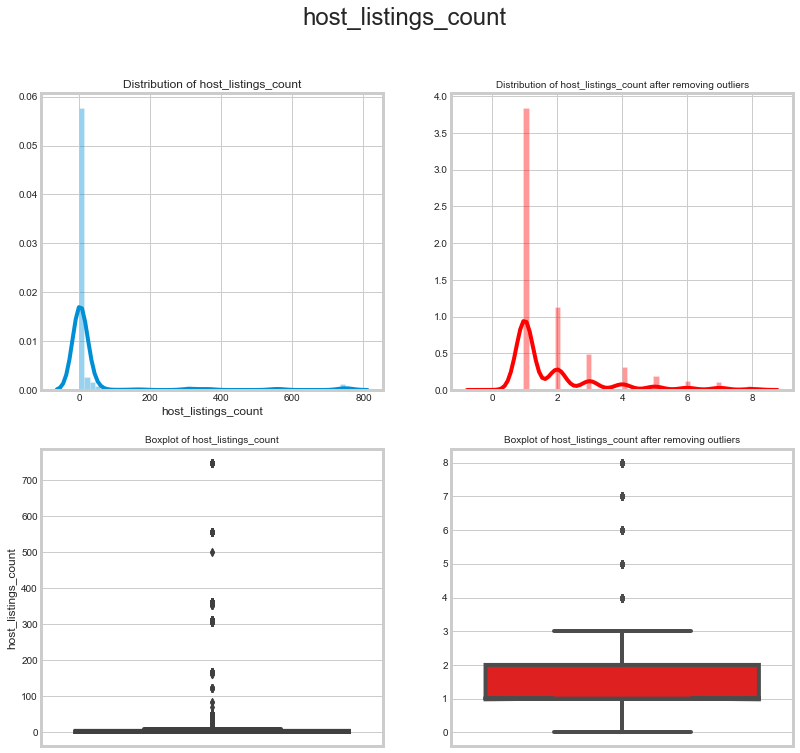

In [101]:
analysis_utils.no_outlier('host_listings_count',df)

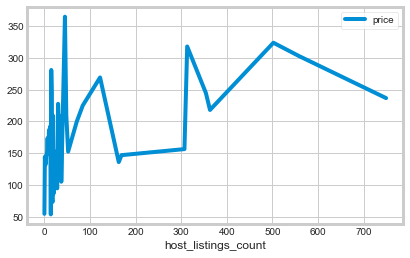

In [102]:
#check wether higher postings lead to price difference
df[['host_listings_count','price']].groupby('host_listings_count').mean().plot(kind = 'line')

**From what we see above the number of postings don't have an affect on the price**

In [103]:
# Check weather the values of 'host_listings_count' match 'host_total_listings_count'
df['test'] = np.where(df['host_listings_count'] == df['host_total_listings_count'], 'match', 'not_match')
df['test'].value_counts()

match        7401
not_match       2
Name: test, dtype: int64

**We can see that host_total_listings_count has the same values as host_listings_count so we will delete it to avoid redundancy**

In [104]:
df['host_has_profile_pic'].head()

0    t
1    t
2    t
3    t
4    t
Name: host_has_profile_pic, dtype: object

In [105]:
# change t , f values to boolean 0 , 1 and make missing values 0 because the profile pic data is not avalible
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(lambda x : 1 if x == 't' else 0)

In [106]:
df['host_identity_verified'].head()

0    t
1    t
2    t
3    t
4    t
Name: host_identity_verified, dtype: object

In [107]:
# change t , f values to boolean 0 , 1 and missing values to 0 because the identity is not varified
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x : 1 if x == 't' else 0)

In [108]:
df['host_verifications'].head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [109]:
df['host_verifications'].isnull().sum()

0

In [110]:
# get the count of host_verifications insted of list
df['host_verifications'] = df['host_verifications'].apply(lambda x : len(x))

In [111]:
df['market'].head()
df['market'].value_counts()

Seattle                  3818
Boston                   3568
Other (International)       1
San Francisco               1
Other (Domestic)            1
Name: market, dtype: int64

In [112]:
# delete unnecessary columns
temp = ['market','test','host_total_listings_count']
for i in temp:
    del df[i]

In [113]:
test = ['host_listings_count','host_has_profile_pic',\
        'host_identity_verified','host_verifications']

In [114]:
df[test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   host_listings_count     7403 non-null   int64
 1   host_has_profile_pic    7403 non-null   int64
 2   host_identity_verified  7403 non-null   int64
 3   host_verifications      7403 non-null   int64
dtypes: int64(4)
memory usage: 231.5 KB


---
#### Property info
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**property_type**|`object`|replace null with mode|`object`|
|**room_type**|`object`|replace null with mode|`object`|
|**accommodates**|`int64`|clean|`int64`|
|**bathrooms**|`float64`|replace null values with mode|`float64`|
|**bedrooms**|`float64`|replace null values with mode|`float64`|
|**beds**|`float64`|replace missing with the mode|`float64`|
|**bed_type**|`object`|clean|`object`|
|**amenities**|`object`|get the count of amenities|`int64`|

In [115]:
temp = ['property_type','room_type','accommodates','bathrooms',\
        'bedrooms','bed_type','beds','amenities']
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  7399 non-null   object 
 1   room_type      7403 non-null   object 
 2   accommodates   7403 non-null   int64  
 3   bathrooms      7373 non-null   float64
 4   bedrooms       7387 non-null   float64
 5   bed_type       7403 non-null   object 
 6   beds           7393 non-null   float64
 7   amenities      7403 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 462.8+ KB


In [116]:
#get teh missing values for all columns needed 
df[temp].isnull().sum()

property_type     4
room_type         0
accommodates      0
bathrooms        30
bedrooms         16
bed_type          0
beds             10
amenities         0
dtype: int64

In [117]:
df[temp].head()

property_type        room_type  accommodates  bathrooms  bedrooms  bed_type  \
0     Apartment  Entire home/apt             4        1.0       1.0  Real Bed   
1     Apartment  Entire home/apt             4        1.0       1.0  Real Bed   
2         House  Entire home/apt            11        4.5       5.0  Real Bed   
3     Apartment  Entire home/apt             3        1.0       0.0  Real Bed   
4         House  Entire home/apt             6        2.0       3.0  Real Bed   

   beds                                          amenities  
0   1.0  {TV,"Cable TV",Internet,"Wireless Internet","A...  
1   1.0  {TV,Internet,"Wireless Internet",Kitchen,"Free...  
2   7.0  {TV,"Cable TV",Internet,"Wireless Internet","A...  
3   2.0  {Internet,"Wireless Internet",Kitchen,"Indoor ...  
4   3.0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...

In [118]:
#get info property_type
df['property_type'].value_counts()

Apartment          4320
House              2295
Condominium         322
Townhouse           172
Loft                 79
Bed & Breakfast      78
Other                39
Cabin                21
Boat                 20
Camper/RV            14
Bungalow             13
Villa                 6
Tent                  5
Dorm                  4
Entire Floor          4
Treehouse             3
Chalet                2
Yurt                  1
Guesthouse            1
Name: property_type, dtype: int64

In [119]:
#fill the missing values with the mode since the data is categorical
df['property_type'].fillna(df['property_type'].mode()[0],inplace=True)
df['property_type'].isnull().sum()

0

In [120]:
#get info room_type
df['room_type'].value_counts()

Entire home/apt    4668
Private room       2538
Shared room         197
Name: room_type, dtype: int64

In [121]:
#check the mean price for each room type
df[['room_type','price']].groupby('room_type').mean()

price
room_type                  
Entire home/apt  188.465296
Private room      86.444838
Shared room       65.908629

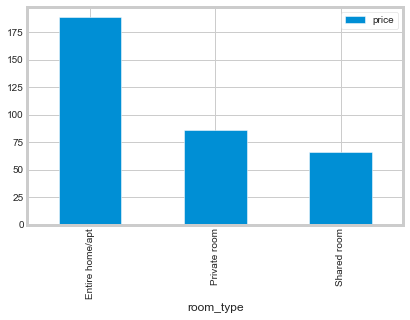

In [122]:
#compare the price difference for each room type
df[['room_type','price']].groupby('room_type').mean().plot(kind = 'bar')

In [123]:
# get into bathrooms
df['bathrooms'].value_counts()

1.0    5633
2.0     851
1.5     456
2.5     192
3.0      85
3.5      70
0.5      38
0.0      21
4.0      10
5.0       7
6.0       4
4.5       4
8.0       2
Name: bathrooms, dtype: int64

In [124]:
#fill the missing values using the mode since its a categorical variable
df['bathrooms'].fillna(df['bathrooms'].mode()[0],inplace=True)
df['bathrooms'].isnull().sum()

0

In [125]:
#get info bedrooms
df['bedrooms'].value_counts()

1.0    4796
2.0    1333
0.0     659
3.0     438
4.0     114
5.0      40
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [126]:
#fill the missing values using the mode since its a categorical variable
df['bedrooms'].fillna(df['bedrooms'].mode()[0],inplace=True)
df['bedrooms'].isnull().sum()

0

In [127]:
room_avg = df[['bedrooms','price']].groupby('bedrooms').mean()

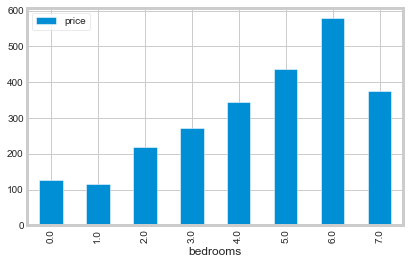

In [128]:
#compare the price difference for each bedroom type
room_avg.plot(kind = 'bar')

In [129]:
#reset the index for calculate the avg price difference between rooms
room_avg.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
room_avg.head()

bedrooms       price
0       0.0  125.811836
1       1.0  116.040939
2       2.0  218.091523
3       3.0  273.200913
4       4.0  343.578947

In [130]:
# This will calculate the avg increase per room
for i in range(1,6):
    avg_price_difference = []
    lower_room_count = room_avg['price'][i] #get the price of room number
    higher_room_count = room_avg['price'][i+1]#get the price of room number + 1
    avg_price_difference.append(higher_room_count-lower_room_count) #subtract the higher higher_room_count from the lower_room_count and append

print('On avrage you will be paying ${} for an extra room'.format(round(np.mean(avg_price_difference))))
    

On avrage you will be paying $142.0 for an extra room


**When taking 0 rooms (studio) out of consideration there is a price increase of an average of 142 dollars per room the number decreases when you exceed than 6 rooms** 

In [131]:
# get info on beds
df['beds'].value_counts()

1.0     4366
2.0     1865
3.0      708
4.0      258
5.0      113
6.0       37
7.0       22
8.0       10
9.0        6
0.0        4
10.0       2
16.0       1
15.0       1
Name: beds, dtype: int64

In [132]:
#fill the missing values using the mode since its a categorical variable
df['beds'].fillna(df['beds'].mode()[0],inplace=True)
df['beds'].isnull().sum()

0

In [133]:
df['bed_type'].value_counts()

Real Bed         7110
Futon             125
Pull-out Sofa      78
Airbed             67
Couch              23
Name: bed_type, dtype: int64

In [134]:
# instead of amenities i will get the amenities count by splitting and getting the length
df['amenities'] = df['amenities'].apply(lambda x : len(x.split(',')) if type(x) == str else 0)
df['amenities'].value_counts() 

15    661
14    599
12    568
17    563
13    560
16    554
18    480
19    478
11    450
10    355
20    322
21    283
22    234
9     228
8     199
23    192
7     123
24    104
25     86
1      83
6      79
26     51
5      48
27     32
4      29
3      18
2      10
28      7
30      5
29      1
31      1
Name: amenities, dtype: int64

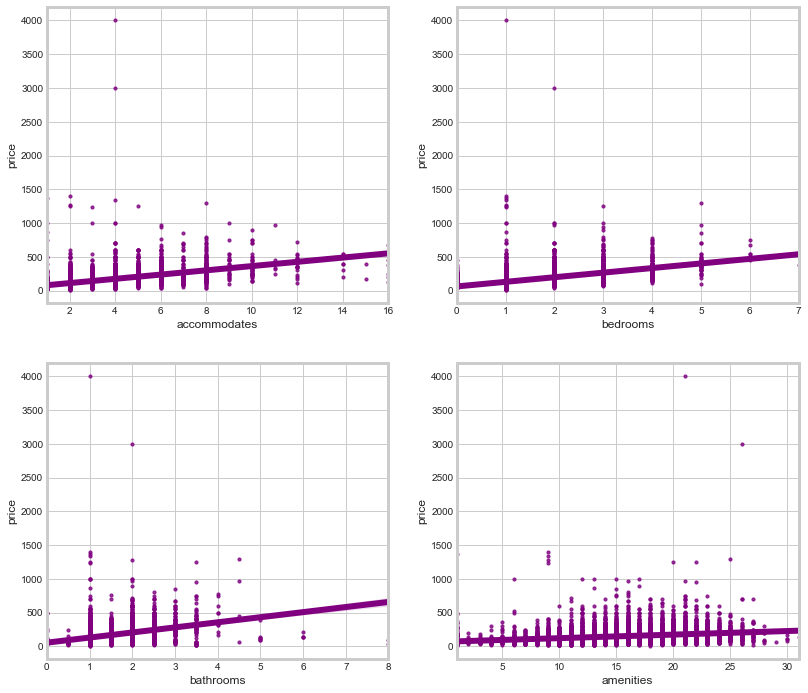

In [135]:
# plot the relationship between the columns and price
plot = ['accommodates','bedrooms','bathrooms','amenities']
analysis_utils.plot_line_correlation(plot,'price',df,'purple')

In [136]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  7403 non-null   object 
 1   room_type      7403 non-null   object 
 2   accommodates   7403 non-null   int64  
 3   bathrooms      7403 non-null   float64
 4   bedrooms       7403 non-null   float64
 5   bed_type       7403 non-null   object 
 6   beds           7403 non-null   float64
 7   amenities      7403 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 462.8+ KB


---
#### booking info 
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**minimum_nights**|`int64`|clean|`int64`|
|**maximum_nights**|`int64`|clean|`int64`|
|**calendar_updated**|`object`|clean|`object`|
|**has_availability**|`object`|change with int bool and fill null with 0|`int64`|
|**availability_30**|`int64`|clean|`int64`|
|**availability_60**|`int64`|clean|`int64`|
|**availability_90**|`int64`|clean|`int64`|
|**availability_365**|`int64`|clean|`int64`|
|**calendar_last_scraped**|`object`|unnecessary delete|

In [137]:
temp = ['minimum_nights','maximum_nights','calendar_updated','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped']
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   minimum_nights         7403 non-null   int64 
 1   maximum_nights         7403 non-null   int64 
 2   calendar_updated       7403 non-null   object
 3   has_availability       3818 non-null   object
 4   availability_30        7403 non-null   int64 
 5   availability_60        7403 non-null   int64 
 6   availability_90        7403 non-null   int64 
 7   availability_365       7403 non-null   int64 
 8   calendar_last_scraped  7403 non-null   object
dtypes: int64(6), object(3)
memory usage: 520.6+ KB


In [138]:
df[temp].head()

minimum_nights  maximum_nights calendar_updated has_availability  \
0               1             365      4 weeks ago                t   
1               2              90            today                t   
2               4              30      5 weeks ago                t   
3               1            1125     6 months ago                t   
4               1            1125      7 weeks ago                t   

   availability_30  availability_60  availability_90  availability_365  \
0               14               41               71               346   
1               13               13               16               291   
2                1                6               17               220   
3                0                0                0               143   
4               30               60               90               365   

  calendar_last_scraped  
0            2016-01-04  
1            2016-01-04  
2            2016-01-04  
3            2016-01-04  
4            2016-01-04

In [139]:
#since all the values are true it means that unavalible is false
df['has_availability'] = df['has_availability'].apply(lambda x : 1 if x == 't' else 0)

In [140]:
#change to datetime format
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

In [141]:
df['calendar_last_scraped'].value_counts()

2016-01-04    3818
2016-09-06    3585
Name: calendar_last_scraped, dtype: int64

In [142]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   minimum_nights         7403 non-null   int64         
 1   maximum_nights         7403 non-null   int64         
 2   calendar_updated       7403 non-null   object        
 3   has_availability       7403 non-null   int64         
 4   availability_30        7403 non-null   int64         
 5   availability_60        7403 non-null   int64         
 6   availability_90        7403 non-null   int64         
 7   availability_365       7403 non-null   int64         
 8   calendar_last_scraped  7403 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 520.6+ KB


In [143]:
del df['calendar_last_scraped']

---
#### Review info
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**number_of_reviews**|`int64`|clean|`int64`|
|**first_review**|`object`|change to date-time fromat and clean|`datetime64`|
|**last_review**|`object`|change to date-time format and clean|`datetime64`|
|**review_scores_rating**|`float64`|replace null values with mean|`float64`|
|**review_scores_accuracy**|`float64`|replace null values with mean|`float64`|
|**review_scores_cleanliness**|`float64`|replace null values with mean|`float64`|
|**review_scores_checkin**|`float64`|replace null values with mean|`float64`|
|**review_scores_communication**|`float64`|replace null values with mean|`float64`|
|**review_scores_location**|`float64`|replace null values with mean|`float64`|
|**review_scores_value**|`float64`|replace null values with mean|`float64`|

In [144]:
temp = ['number_of_reviews','first_review','last_review','review_scores_rating',\
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',\
        'review_scores_communication','review_scores_location','review_scores_value']
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            7403 non-null   int64  
 1   first_review                 6020 non-null   object 
 2   last_review                  6020 non-null   object 
 3   review_scores_rating         5943 non-null   float64
 4   review_scores_accuracy       5922 non-null   float64
 5   review_scores_cleanliness    5932 non-null   float64
 6   review_scores_checkin        5925 non-null   float64
 7   review_scores_communication  5934 non-null   float64
 8   review_scores_location       5926 non-null   float64
 9   review_scores_value          5926 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 578.5+ KB


In [145]:
df[temp].head()

number_of_reviews first_review last_review  review_scores_rating  \
0                207   2011-11-01  2016-01-02                  95.0   
1                 43   2013-08-19  2015-12-29                  96.0   
2                 20   2014-07-30  2015-09-03                  97.0   
3                  0          NaN         NaN                   NaN   
4                 38   2012-07-10  2015-10-24                  92.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   
2                    10.0                       10.0                   10.0   
3                     NaN                        NaN                    NaN   
4                     9.0                        9.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  
0                         10.0                     9.0                 10.0  
1                         10.0                    10.0                 10.0  
2                         10.0                    10.0                 10.0  
3                          NaN                     NaN                  NaN  
4                         10.0                     9.0                  9.0

In [146]:
#first_review and last_review will be changed to date_time format
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

# fill the null values in both columns with the mode
df['first_review'].fillna(df['first_review'].mode()[0],inplace = True)
df['last_review'].fillna(df['last_review'].mode()[0],inplace = True)

In [147]:
#since these values are numerical we can replace the missing values with the mean
replace = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
           'review_scores_checkin','review_scores_communication','review_scores_location',\
           'review_scores_value']

In [148]:
# replace the columns with the mean using the get mean function 
for i in replace:
    analysis_utils.replace_mean(i,df)

In [149]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   number_of_reviews            7403 non-null   int64         
 1   first_review                 7403 non-null   datetime64[ns]
 2   last_review                  7403 non-null   datetime64[ns]
 3   review_scores_rating         7403 non-null   float64       
 4   review_scores_accuracy       7403 non-null   float64       
 5   review_scores_cleanliness    7403 non-null   float64       
 6   review_scores_checkin        7403 non-null   float64       
 7   review_scores_communication  7403 non-null   float64       
 8   review_scores_location       7403 non-null   float64       
 9   review_scores_value          7403 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(1)
memory usage: 578.5 KB


In [150]:
# place the columns in a list to plot
plot = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',\
        'review_scores_checkin','review_scores_communication','review_scores_location',\
        'review_scores_value','number_of_reviews']
        

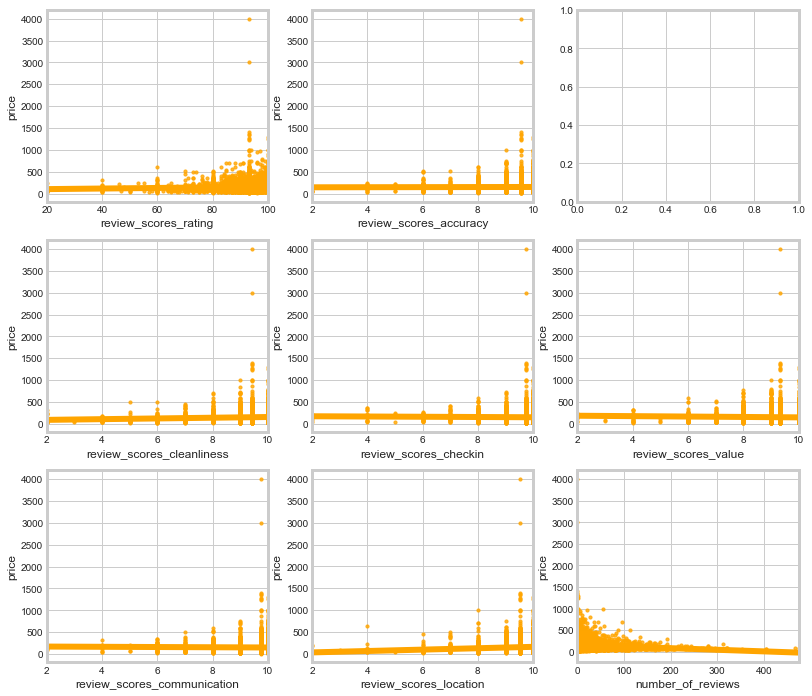

In [151]:
# plot the scatter data distribution in relation to the price
analysis_utils.plot_line_correlation(plot,'price',df,'orange')

**From what we can see above these features don't have an effect on price**

In [152]:
#round the review_scores_rating to check avg price:
df['review_scores_rating'] = df['review_scores_rating'].apply(lambda x: round(x))

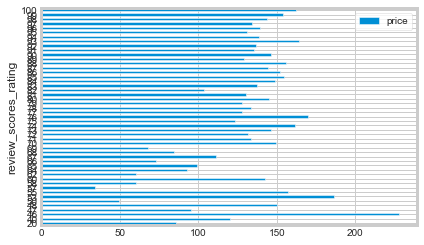

In [153]:
df[['review_scores_rating','price']].groupby('review_scores_rating').mean().plot(kind = 'barh')

---
#### Additional posting info
---

|Feature|Type|Action|New_type|
|---|---|---|---|
|**instant_bookable**|`object`|change to int bool|`int64`|
|**cancellation_policy**|`object`|clean|`object`|
|**instant_bookable**|`object`|change to int bool|`int64`|
|**require_guest_profile_picture**|`float64`|change to int bool|`int64`|
|**require_guest_phone_verification**|`float64`|change to int bool|`int64`|
|**calculated_host_listings_count**|`int64`|clean|`int64`|
|**reviews_per_month**|`float64`|fill missing with mean|`float64`|
|**requires_license**|`object`|change to int bool (delete since all values are false)|
|**jurisdiction_names**|`object`|delete not nacassery|


In [154]:
temp = ['instant_bookable','requires_license','jurisdiction_names','instant_bookable',\
        'cancellation_policy','require_guest_profile_picture',\
        'require_guest_phone_verification','calculated_host_listings_count','reviews_per_month']
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   instant_bookable                  7403 non-null   object 
 1   requires_license                  7403 non-null   object 
 2   jurisdiction_names                3818 non-null   object 
 3   instant_bookable                  7403 non-null   object 
 4   cancellation_policy               7403 non-null   object 
 5   require_guest_profile_picture     7403 non-null   object 
 6   require_guest_phone_verification  7403 non-null   object 
 7   calculated_host_listings_count    7403 non-null   int64  
 8   reviews_per_month                 6020 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 520.6+ KB


In [155]:
df[temp].head()

instant_bookable requires_license jurisdiction_names instant_bookable  \
0                f                f         WASHINGTON                f   
1                f                f         WASHINGTON                f   
2                f                f         WASHINGTON                f   
3                f                f         WASHINGTON                f   
4                f                f         WASHINGTON                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1              strict                             t   
2              strict                             f   
3            flexible                             f   
4              strict                             f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               2   
1                                t                               6   
2                                f                               2   
3                                f                               1   
4                                f                               1   

   reviews_per_month  
0               4.07  
1               1.48  
2               1.15  
3                NaN  
4               0.89

In [156]:
#replace with mean since it's a continues variable
analysis_utils.replace_mean('reviews_per_month',df)

In [157]:
# change t , f values to boolean 0 , 1 and missing values to 0 
change_to_bool = ['requires_license','instant_bookable','require_guest_profile_picture',\
                  'require_guest_phone_verification']
for i in change_to_bool:
    analysis_utils.change_tobool(i,df)

In [158]:
df[temp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   instant_bookable                  7403 non-null   int64  
 1   requires_license                  7403 non-null   int64  
 2   jurisdiction_names                3818 non-null   object 
 3   instant_bookable                  7403 non-null   int64  
 4   cancellation_policy               7403 non-null   object 
 5   require_guest_profile_picture     7403 non-null   int64  
 6   require_guest_phone_verification  7403 non-null   int64  
 7   calculated_host_listings_count    7403 non-null   int64  
 8   reviews_per_month                 7403 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 520.6+ KB


In [159]:
#delete unnecessary columns
delete = ['jurisdiction_names','requires_license']
for i in delete:
    del df[i]

In [160]:
df['weekly_price']

0          0.0
1       1000.0
2          0.0
3        650.0
4          0.0
         ...  
7398       0.0
7399       0.0
7400       0.0
7401       0.0
7402       0.0
Name: weekly_price, Length: 7403, dtype: float64

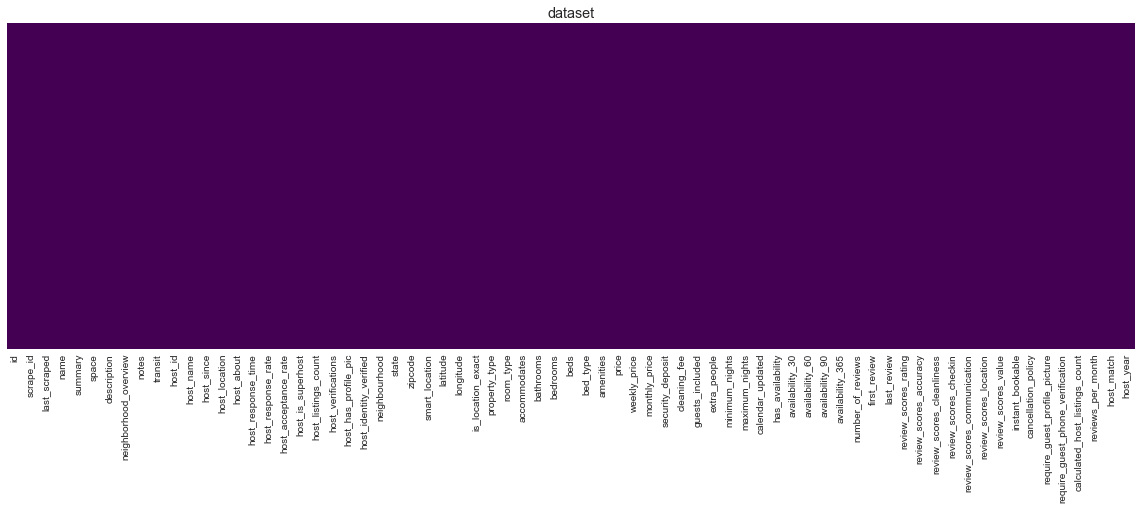

id : % 0 With 0 missing values
scrape_id : % 0 With 0 missing values
last_scraped : % 0 With 0 missing values
name : % 0 With 0 missing values
summary : % 0 With 0 missing values
space : % 0 With 0 missing values
description : % 0 With 0 missing values
neighborhood_overview : % 0 With 0 missing values
notes : % 0 With 0 missing values
transit : % 0 With 0 missing values
host_id : % 0 With 0 missing values
host_name : % 0 With 0 missing values
host_since : % 0 With 0 missing values
host_location : % 0 With 0 missing values
host_about : % 0 With 0 missing values
host_response_time : % 0 With 0 missing values
host_response_rate : % 0 With 0 missing values
host_acceptance_rate : % 0 With 0 missing values
host_is_superhost : % 0 With 0 missing values
host_listings_count : % 0 With 0 missing values
host_verifications : % 0 With 0 missing values
host_has_profile_pic : % 0 With 0 missing values
host_identity_verified : % 0 With 0 missing values
neighbourhood : % 0 With 0 missing values
state :

In [161]:
# double-check whether the data is fully cleaned or not
analysis_utils.missing_heat_map(df)

In [162]:
#save to csv
df.to_csv('data/clean_airbnb.csv')

### Explatory data analysis

In [163]:
#sns.pairplot(c_df)

In [164]:
# get the overall coorelation map
analysis_utils.magnify_corr(df)

In [165]:
# get the top 10 correlated features with price
top_features = analysis_utils.top_corr_features('price',10,df)

list of 10 best positive features based on pairwise correlation:
 ['price', 'accommodates', 'bedrooms', 'beds', 'cleaning_fee', 'bathrooms', 'guests_included', 'monthly_price', 'amenities', 'security_deposit']


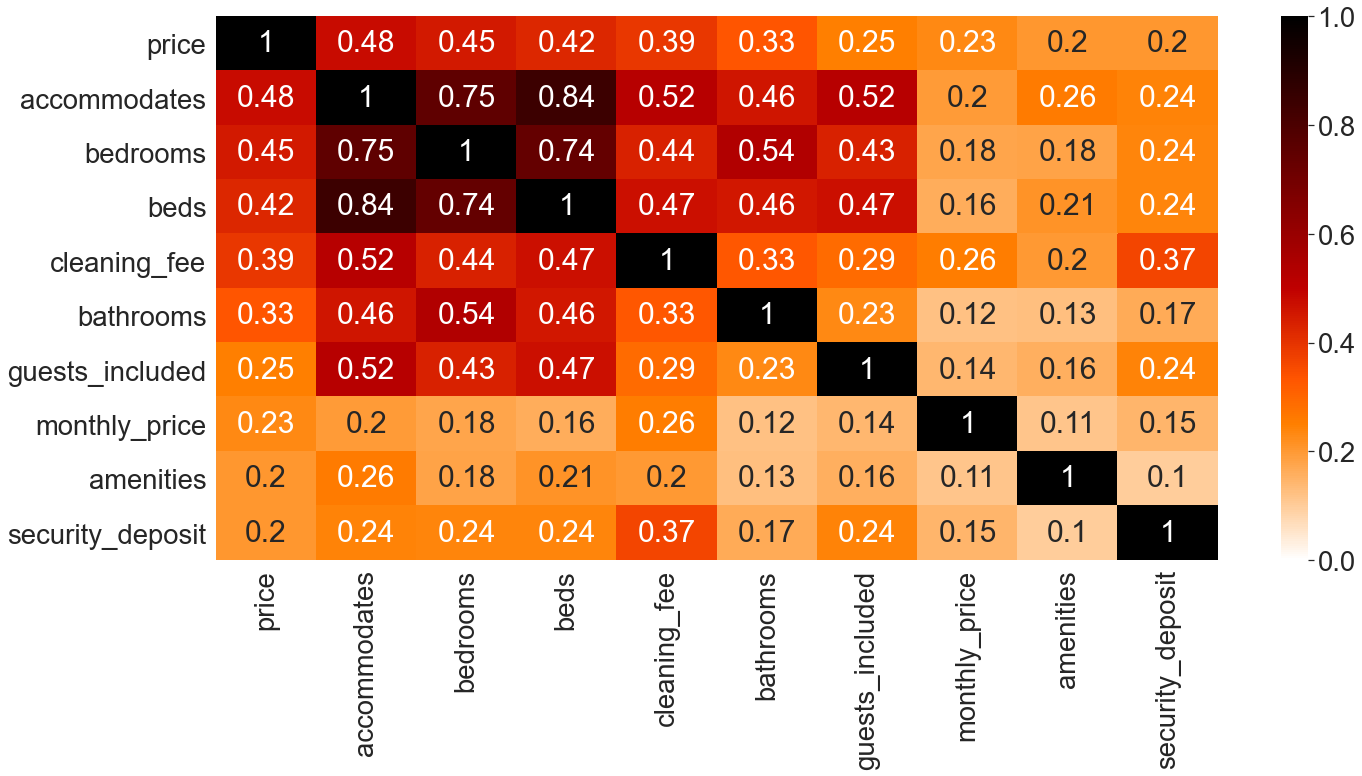

In [166]:
# plotting the top 10 correlated features with price
analysis_utils.plot_corr(df[top_features])

**As shown above we can see that the features that have the highest correlation with the price are:-**

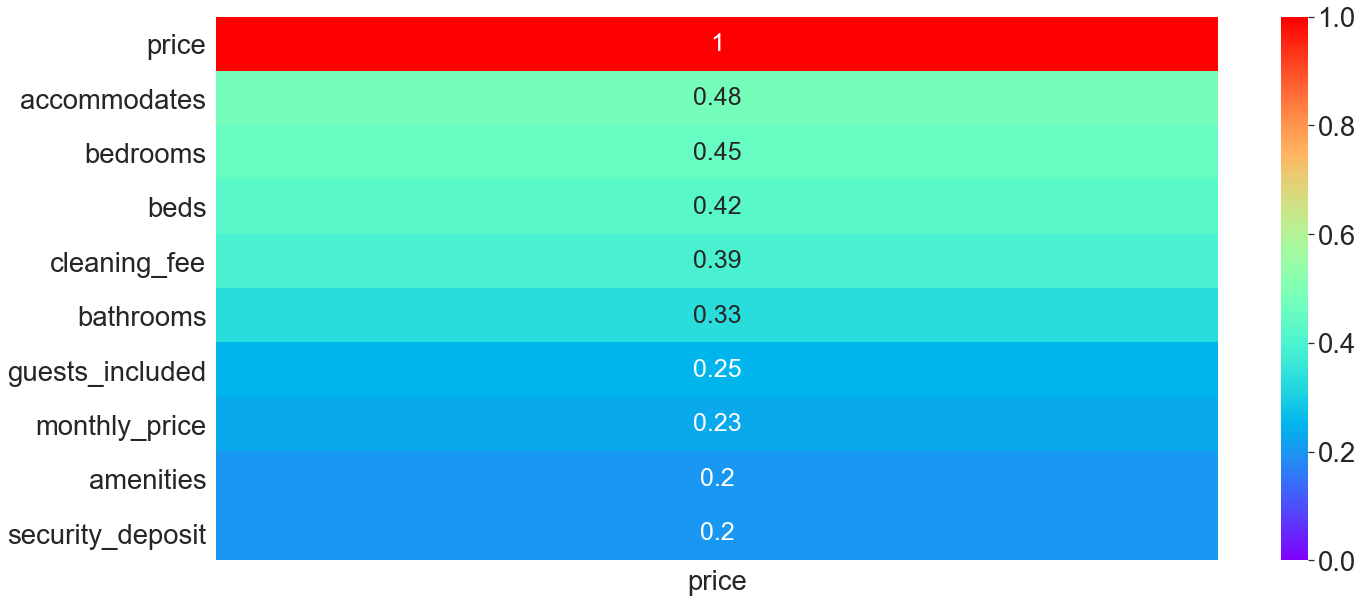

In [167]:
#getting the top 10 features corrilation with price
plt.figure(figsize=(20,10))
corr=df[top_features].corr()[['price']]
sns.set(font_scale=2.5)
sns.heatmap(corr,annot=True, vmin=0, vmax=1,annot_kws={"size": 25},cmap = 'rainbow')

In [168]:
# checking the negitive corralations (turns out to be unsignificant)
correlation = df.corr(method='pearson')
columns_smal = correlation.nsmallest(30,'price')[['price']].head(10)
columns_smal #Grabbing the largest corrilations (Neagitive)

price
has_availability     -0.185172
latitude             -0.184161
host_acceptance_rate -0.152711
reviews_per_month    -0.139660
host_match           -0.135898
number_of_reviews    -0.110149
host_verifications   -0.052746
transit              -0.049306
instant_bookable     -0.042674
review_scores_value  -0.029752

### Modeling For price (to fill missing values)

#### Qustion: Can we predict the weekly price from the price?

In [169]:
df_fin = df[['price','weekly_price']]

In [170]:
# remove values that contain 0 for better modelling
df_fin = df[df['weekly_price'] != 0]
# place the values that contain 0 in another varible to predict
perdict = df[df['weekly_price'] == 0]

In [171]:
# seprate the features and the target to try and predict the weekly price
fin_x = df_fin[['price']]
fin_target = df_fin['weekly_price']
perdict_this = perdict[['price']]

In [172]:
print('features : ',fin_x.shape,'Target : ',fin_target.shape,'perdict : ',perdict_this.shape)

features :  (2901, 1) Target :  (2901,) perdict :  (4502, 1)


In [173]:
#split the data
x_train,x_test,y_train,y_test = train_test_split(fin_x, fin_target, test_size= .20 , shuffle = True)

In [174]:
alpha = np.logspace(-4, 4, 10)
ridge = RidgeCV(alphas = alpha).fit(x_train, y_train)
print ('Training Score',ridge.score(x_train, y_train))
scores = cross_val_score(ridge, x_train, y_train, cv=5)
perdicted = ridge.predict(perdict_this)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())
print('testing Score :' , ridge.score(x_test,y_test))

Training Score 0.8562110900101384
Cross-validated training scores: [0.86386589 0.85048624 0.82959984 0.87601881 0.84115749]
Mean of Ccoss-validated training scores: 0.8522256550681557
testing Score : 0.8897656659741937


In [175]:
# replace the 0's with the predicted values in the predict dataframe
perdict['weekly_price'] = perdicted

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
#join the our original df with the predicted weekly_price df using id
df = df.merge(perdict[['weekly_price','id']],how='left',on='id')

In [177]:
# fill use the two columns of real and predicted to create one column that has all values
df['weekly_price'] = df['weekly_price_y'].fillna(df['weekly_price_x'])

In [178]:
delete = ['weekly_price_y','weekly_price_x','monthly_price']
for i in delete:
    del df[i]

**When it comes to weekly_price with only using the price we predicted the outcome with a %86 accuracy testing score. Then we filled the missing values using the prediction.**

### Modeling (With weekly_price)

### Fix the data for modeling

In [179]:
#select the features to drop because it will intoduce a huge number of features when dummied 
features = ['first_review','last_review','calendar_last_scraped', 'calendar_updated',\
            'zipcode', 'street', 'host_location', 'host_since', 'host_name','host_name',\
            'host_id','name','last_scraped','monthly_price','scrape_id','id','Unnamed: 0','price']
select_features = [x for x in df.columns if x not in features] 
select_features 

['summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'state',
 'smart_location',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_pi

In [180]:
x = df[select_features] #specify the selected features as the x var 
y = df['price'] #make price the target 

In [181]:
# replace the object varibles to dummy varibles to apply to the model
x = pd.get_dummies(x,drop_first=True) #Converting the data into dummies to apply to models
x.head()

summary  space  description  neighborhood_overview  notes  transit  \
0        0    180          180                      0      0        0   
1       39    145          152                     28    172       28   
2       39    188          179                    113     29       36   
3       42      0           42                      0      0        0   
4       29     85          174                     89      2       56   

   host_about  host_response_rate  host_acceptance_rate  host_is_superhost  \
0          73                96.0                 100.0                  0   
1          14                98.0                 100.0                  1   
2          66                67.0                 100.0                  0   
3           0               100.0                 100.0                  0   
4          62               100.0                 100.0                  0   

   ...  property_type_Yurt  room_type_Private room  room_type_Shared room  \
0  ...                   0                       0                      0   
1  ...                   0                       0                      0   
2  ...                   0                       0                      0   
3  ...                   0                       0                      0   
4  ...                   0                       0                      0   

   bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
0               0               0                       0                  1   
1               0               0                       0                  1   
2               0               0                       0                  1   
3               0               0                       0                  1   
4               0               0                       0                  1   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                             1                           0   
1                             0                           1   
2                             0                           1   
3                             0                           0   
4                             0                           1   

   cancellation_policy_super_strict_30  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 236 columns]

In [182]:
print(y.shape)
x.shape

(7403,)


(7403, 236)

In [183]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= .20 , shuffle = True)

In [184]:
print(x_train.shape,x_test.shape)

(5922, 236) (1481, 236)


In [185]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Call the StandardScaler
scaler.fit(x_train) #Fit x_train to the scaler

# transforming features 
x_train_ss = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_ss = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
print("scaled features are in 'x_train_ss' and 'x_test_ss'")
print((len(x_train_ss),len(x_test_ss)))

scaled features are in 'x_train_ss' and 'x_test_ss'
(5922, 1481)


#### LinearRegression

In [186]:
lm = LinearRegression()
lm.fit(x_train_ss,y_train)
print('Training Score :' , lm.score(x_train_ss,y_train))
print('testing Score :' , lm.score(x_test_ss,y_test))

Training Score : 0.9707667101845413
testing Score : 0.9510100815272574


#### Elastic

In [187]:
en = ElasticNetCV(l1_ratio=1.).fit(x_train_ss, y_train)
print ('Training Score',en.score(x_train_ss, y_train))
scores = cross_val_score(en, x_train_ss, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())
print('testing Score :' , en.score(x_test_ss,y_test))

Training Score 0.9698280091853397
Cross-validated scores: [0.97640541 0.93990459 0.96833594 0.95086437 0.9808266 ]
Mean of Cross-validated scores: 0.9632673827276476
testing Score : 0.9535943921222088


#### ridge

In [188]:
alpha = np.logspace(-4, 4, 10)
ridge = RidgeCV(alphas = alpha).fit(x_train_ss, y_train)
print ('Training Score',ridge.score(x_train_ss, y_train))
scores = cross_val_score(ridge, x_train_ss, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())
print('testing Score :' , ridge.score(x_test_ss,y_test))

Training Score 0.9707203058435677
Cross-validated training scores: [0.97586805 0.93746543 0.96739058 0.94323484 0.98030732]
Mean of Ccoss-validated training scores: 0.9608532440167931
testing Score : 0.9516937472188992


#### lasso

In [189]:
lasso_alphas = np.arange(1,200, 0.5)
lasso_cv = LassoCV(cv=5,alphas=lasso_alphas)
lasso_cv.fit(x_train_ss, y_train)
scores = cross_val_score(lasso_cv, x_train_ss, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())
print('Training Score :' , lasso_cv.score(x_train_ss , y_train))
print('testing Score :' , lasso_cv.score(x_test_ss,y_test))

Cross-validated training scores: [0.97606444 0.94012469 0.9681969  0.95069024 0.98083421]
Mean of Ccoss-validated training scores: 0.9631820972151038
Training Score : 0.9690643467397351
testing Score : 0.9539384073182269


#### RandomForest

In [190]:
forest_cv = RandomForestRegressor(n_jobs=-1)
forest_cv.fit(x_train_ss , y_train)

print('Train Score :' , forest_cv.score(x_train_ss , y_train))
print('testing Score :' , forest_cv.score(x_test_ss,y_test))

Train Score : 0.9873870588023373
testing Score : 0.9496181220706084


In [191]:
forest_cv = RandomForestRegressor(n_jobs=-1)
parameters = {'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}
random_grid = GridSearchCV(RandomForestRegressor(), parameters, cv = 5)
random_grid.fit(x_train_ss , y_train)
print('Training Score :' , random_grid.score(x_train_ss , y_train))
print('testing Score :' , random_grid.score(x_test_ss,y_test))

Training Score : 0.5532745694819197
testing Score : 0.6044102190350829


#### KNeighborsRegressor

In [192]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=1)
grid_knn.fit(x_train_ss, y_train)
print('Training Score :' , grid_knn.score(x_train_ss , y_train))
print('testing Score :' , grid_knn.score(x_test_ss,y_test))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.1min finished


Training Score : 0.8142451258309765
testing Score : 0.5347018340703776


### Modeling (without weekly_price)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 7402
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                7403 non-null   int64         
 1   scrape_id                         7403 non-null   int64         
 2   last_scraped                      7403 non-null   object        
 3   name                              7403 non-null   object        
 4   summary                           7403 non-null   int64         
 5   space                             7403 non-null   int64         
 6   description                       7403 non-null   int64         
 7   neighborhood_overview             7403 non-null   int64         
 8   notes                             7403 non-null   int64         
 9   transit                           7403 non-null   int64         
 10  host_id                           7403 non-null 

In [239]:
#select the features to drop because it will intoduce a huge number of features when dummied 
features = ['first_review','last_review','calendar_last_scraped', 'calendar_updated',\
            'zipcode', 'street','host_location', 'host_since', 'host_name','host_name',\
            'host_id','name','last_scraped','monthly_price','scrape_id','weekly_price','id','Unnamed: 0','price']
select_features = [x for x in df.columns if x not in features] 
select_features 

['summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'state',
 'smart_location',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_pi

In [240]:
x = df[select_features] #specify the selected features as the x var 
y = df['price'] #make price the target 

In [241]:
# replace the object varibles to dummy varibles to apply to the model
x = pd.get_dummies(x,drop_first=True) #Converting the data into dummies to apply to models
x.head()

summary  space  description  neighborhood_overview  notes  transit  \
0        0    180          180                      0      0        0   
1       39    145          152                     28    172       28   
2       39    188          179                    113     29       36   
3       42      0           42                      0      0        0   
4       29     85          174                     89      2       56   

   host_about  host_response_rate  host_acceptance_rate  host_is_superhost  \
0          73                96.0                 100.0                  0   
1          14                98.0                 100.0                  1   
2          66                67.0                 100.0                  0   
3           0               100.0                 100.0                  0   
4          62               100.0                 100.0                  0   

   ...  property_type_Yurt  room_type_Private room  room_type_Shared room  \
0  ...                   0                       0                      0   
1  ...                   0                       0                      0   
2  ...                   0                       0                      0   
3  ...                   0                       0                      0   
4  ...                   0                       0                      0   

   bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
0               0               0                       0                  1   
1               0               0                       0                  1   
2               0               0                       0                  1   
3               0               0                       0                  1   
4               0               0                       0                  1   

   cancellation_policy_moderate  cancellation_policy_strict  \
0                             1                           0   
1                             0                           1   
2                             0                           1   
3                             0                           0   
4                             0                           1   

   cancellation_policy_super_strict_30  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  

[5 rows x 235 columns]

In [242]:
print(y.shape)
x.shape

(7403,)


(7403, 235)

In [243]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= .20 , shuffle = True)

In [244]:
print(x_train.shape,x_test.shape)

(5922, 235) (1481, 235)


In [245]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Call the StandardScaler
scaler.fit(x_train) #Fit x_train to the scaler

# transforming features 
x_train_ss = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test_ss = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
print("scaled features are in 'x_train_ss' and 'x_test_ss'")
print((len(x_train_ss),len(x_test_ss)))

scaled features are in 'x_train_ss' and 'x_test_ss'
(5922, 1481)


#### LinearRegression

In [246]:
lm = LinearRegression()
lm.fit(x_train_ss,y_train)
print('Training Score :' , lm.score(x_train_ss,y_train))
print('testing Score :' , lm.score(x_test_ss,y_test))

Training Score : 0.44894355808085806
testing Score : -6.135162197358877e+20


#### Elastic

In [248]:
en = ElasticNetCV(l1_ratio=1.).fit(x_train_ss, y_train)
print ('Training Score',en.score(x_train_ss, y_train))
scores = cross_val_score(en, x_train_ss, y_train, cv=5)
print("Cross-validated scores:", scores)
print("Mean of Cross-validated scores:", scores.mean())
print('testing Score :' , en.score(x_test_ss,y_test))

Training Score 0.4448271983599797
Cross-validated scores: [0.25957129 0.51816421 0.49545919 0.38952292 0.57347235]
Mean of Cross-validated scores: 0.4472379903927918
testing Score : -75.79620201207055


#### ridge

In [249]:
alpha = np.logspace(-4, 4, 10)
ridge = RidgeCV(alphas = alpha).fit(x_train_ss, y_train)
print ('Training Score',ridge.score(x_train_ss, y_train))
scores = cross_val_score(ridge, x_train_ss, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())
print('testing Score :' , ridge.score(x_test_ss,y_test))

Training Score 0.4475734821952469
Cross-validated training scores: [0.25947973 0.5151862  0.49108918 0.38883422 0.56976316]
Mean of Ccoss-validated training scores: 0.44487049971902837
testing Score : -395.5899791889624


#### lasso

In [250]:
lasso_alphas = np.arange(1,200, 0.5)
lasso_cv = LassoCV(cv=5,alphas=lasso_alphas)
lasso_cv.fit(x_train_ss, y_train)
scores = cross_val_score(lasso_cv, x_train_ss, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean of Ccoss-validated training scores:", scores.mean())
print('Training Score :' , lasso_cv.score(x_train_ss , y_train))
print('testing Score :' , lasso_cv.score(x_test_ss,y_test))

Cross-validated training scores: [0.25654395 0.51371218 0.49379289 0.38804025 0.56954548]
Mean of Ccoss-validated training scores: 0.44432694908212866
Training Score : 0.4374079572816336
testing Score : 0.5782295425802836


#### RandomForest

In [251]:
forest_cv = RandomForestRegressor(n_jobs=-1)
forest_cv.fit(x_train_ss , y_train)

print('Train Score :' , forest_cv.score(x_train_ss , y_train))
print('testing Score :' , forest_cv.score(x_test_ss,y_test))

Train Score : 0.9138586360809493
testing Score : 0.5847621357846859


In [252]:
forest_cv = RandomForestRegressor(n_jobs=-1)
parameters = {'max_features':np.arange(5,10),'n_estimators':[500],'min_samples_leaf': [10,50,100,200,500]}
random_grid = GridSearchCV(RandomForestRegressor(), parameters, cv = 5)
random_grid.fit(x_train_ss , y_train)
print('Training Score :' , random_grid.score(x_train_ss , y_train))
print('testing Score :' , random_grid.score(x_test_ss,y_test))

Training Score : 0.4370311395396173
testing Score : 0.5186896409572681


#### KNeighborsRegressor

In [253]:
param_grid = {'n_neighbors' : [3,4,5,6,7,10,15]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, refit=True, verbose=1)
grid_knn.fit(x_train_ss, y_train)
print('Training Score :' , grid_knn.score(x_train_ss , y_train))
print('testing Score :' , grid_knn.score(x_test_ss,y_test))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.1min finished


Training Score : 0.49075101025510126
testing Score : 0.4658736782099495


**Result: Using the predicted weekly_price we achieved a testing accuracy of %95 using (Lasso, Ridge, Elastic, RandomForest).Although this is interesting it is a false score that can't be used for our modeling. The problem introduced was data leakage, therefore, the high testing scores were justified. Without using the weekly_price we achieved a %58 score with (RandomForest and Lasso)**